**Autores:**
- David Moreno Vituri
- Ricardo Sánchez Olivares
- Íñigo Alegre Jiménez

# Objetivos: SEGMENTACIÓN DE CLIENTES

---
## Propuesta de valor
El objetivo de este ejercicio es realizar una segmentación de clientes y poder clasificarlos en varios grupos bien distinguidos en base a características comunes entre clientes.

## Motivaciones para resolverlo
La creación de un modelo predictivo podría ayudar a la empresa en:

- **Mejor personalización de productos y servicios**
La segmentación permite a las empresas identificar diferentes grupos de clientes con características y necesidades específicas. Esto ayuda a personalizar productos, servicios y campañas de marketing, asegurando que se adapten mejor a cada segmento.

- **Optimización de campañas de marketing**
Al identificar segmentos de clientes con comportamientos o características similares, las empresas pueden diseñar campañas de marketing dirigidas y más eficientes, lo que se traduce en una mejor conversión de ventas y un menor costo en publicidad.

- **Retención y fidelización de clientes**
Al comprender las necesidades y preferencias de diferentes segmentos, las empresas pueden crear estrategias para mejorar la experiencia del cliente, aumentando la satisfacción y fidelidad. Esto es crucial para reducir la tasa de abandono.

- **Mejora en la toma de decisiones estratégicas**
Con una segmentación adecuada, las empresas pueden tomar decisiones basadas en datos para enfocarse en los segmentos más rentables, priorizando inversiones y recursos en áreas que generen mayor valor.

---
## Orígenes de datos
Los datos usados en este ejercicio se obtienen tras realizar un procesado de las tablas proporcionadas por Frank, el director de IT. El procesamiento se puede seguir en el jupyter notebook llamado CAPSTONE. Cada fila del dataset corresponde a un cliente único, identificada por el campo **cid**.

---

## Tarea de ML
La tarea de machine learning asociada a un problema de segmentación de clientes es generalmente clustering (agrupamiento). El clustering es una técnica de aprendizaje no supervisado cuyo objetivo es identificar patrones y agrupar los datos en subconjuntos (clusters) de manera que los clientes dentro de un mismo grupo sean más similares entre sí y diferentes a los de otros grupos.

## Algoritmo

Para la resolución de esta tarea de clusterización usaremos el algoritmo K-Means. Este se trata de uno de los algoritmos más utilizados para segmentación. Divide a los clientes en un número predefinido de clusters (k), donde la distancia entre los puntos de datos (clientes) y los centroides de los clusters se minimiza.

---

<a id='index'></a>
## Índice

[Importación de librerías](#importacion_librerias)<br>


## Data Understanding

[Data Understanding - EDA](#eda)<br>
[Imputación de nulos](#imputacion_nulos)<br>
[Selección de columnas](#selec_cols)<br>
[Análisis Univariante](#analisis_univar)<br>

## Data Preparation

[Procesamiento del dataset](#procesamiento)<br>

## KMeans

[Elbow curve](#elbow)<br>
[Segmentación final](#final)<br>

<a id='importacion_librerias'></a>
# Importación de librerías
[Volver al índice](#index)

En este apartado hacemos la importación de las principales librerías y métodos que usaremos a lo largo del dataset.

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100


# librerías para crear gráficas
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# módulos de sklearn 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans
from sklearn import set_config
set_config(transform_output = "pandas")

# pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# DATA UNDERSTANDING

<a id='eda'></a>
## Data Understanding - EDA
[Volver al índice](#index)

En este apartado importamos el datasets en el que se encuentra toda la información asociada a los clientes en el último mes del cual tenemos registro. Una vez importado, observamos el tamaño del mismo, el tipo de atributos disponibles (numéricos, categóricos), los estadísticos descriptivos más relevantes de cada atributo(valores medios, dispersión, percentiles, etc.) y el número de valores nulos.

In [2]:
# importación del dataset previamente construido
info_clientes = pd.read_pickle('info_clientes.pkl')
ultimo_mes_info = info_clientes[(info_clientes['pk_partition'] >= '2019-05-01') & (info_clientes['pk_partition'] <= '2019-06-01')]

ultimo_mes_info.head()

pk_cid pk_partition country_id  region_code gender  age deceased  \
1734412  657826   2019-05-01         ES           25      H   44        N   
1734413  657817   2019-05-01         ES            8      V   32        N   
1734414  657986   2019-05-01         ES           41      H   39        N   
1734415  657905   2019-05-01         ES           28      H   85        N   
1734416  657336   2019-05-01         ES           28      V   38        N   

            salary age_group salary_bracket  em_acount_consecutive_months  \
1734412   54493.38     35-44            low                            17   
1734413        NaN     25-34            NaN                             0   
1734414  100993.17     35-44         medium                             0   
1734415  154059.09       55+           high                            17   
1734416        NaN     35-44            NaN                             2   

         debit_card_consecutive_months  pension_plan_consecutive_months  \
1734412                              0                                0   
1734413                              0                                0   
1734414                             17                                3   
1734415                              0                                0   
1734416                              0                                0   

         payroll_consecutive_months  payroll_account_consecutive_months  \
1734412                           0                                   0   
1734413                           0                                   0   
1734414                           3                                  17   
1734415                           0                                   0   
1734416                           0                                   0   

         emc_account_consecutive_months  credit_card_consecutive_months  \
1734412                               0                               0   
1734413                               0                               0   
1734414                              17                               2   
1734415                               0                               0   
1734416                               0                               0   

         short_term_deposit_consecutive_months  \
1734412                                      0   
1734413                                      0   
1734414                                      0   
1734415                                      0   
1734416                                      0   

         long_term_deposit_consecutive_months  securities_consecutive_months  \
1734412                                     0                              0   
1734413                                     0                              0   
1734414                                     0                              0   
1734415                                    17                              0   
1734416                                     0                              0   

         funds_consecutive_months  loans_consecutive_months  \
1734412                         0                         0   
1734413                         0                         0   
1734414                         0                         0   
1734415                         0                         0   
1734416                         0                         0   

         mortgage_consecutive_months  short_term_deposit  loans  mortgage  \
1734412                            0                   0      0         0   
1734413                            0                   0      0         0   
1734414                            0                   0      0         0   
1734415                            0                   0      0         0   
1734416                            0                   0      0         0   

         funds  securities  long_term_deposit  em_account_pp  credit_card  \
1734412      0           0   

In [3]:
ultimo_mes_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442995 entries, 1734412 to 2177406
Data columns (total 64 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   pk_cid                                 442995 non-null  int64         
 1   pk_partition                           442995 non-null  datetime64[ns]
 2   country_id                             442995 non-null  object        
 3   region_code                            442995 non-null  int32         
 4   gender                                 442995 non-null  object        
 5   age                                    442995 non-null  int64         
 6   deceased                               442995 non-null  object        
 7   salary                                 293468 non-null  float64       
 8   age_group                              442995 non-null  object        
 9   salary_bracket                         293468 

<a id='imputacion_nulos'></a>
## Imputación de nulos
[Volver al índice](#index)

En este apartado observamos las columnas que poseen nulos e imputamos los mismos de modo que no cambiemos su distribución de manera significativa.

In [4]:
num_nulos = pd.DataFrame(ultimo_mes_info.isna().sum(),columns=['Num_nulos'])
num_nulos[num_nulos['Num_nulos']>0]

Num_nulos
salary             149527
salary_bracket     149527
total_spend        293445

Nos vamos a centrar en imputar los nulos de **salary** y **total_spend**, ya que **salary_bracket** se trata de una columna directamente relacionada con salary y la eliminaremos más tarde.

Para ello creamos una función para observar la distribución de aquellas variables que nos interesen.

In [5]:
def grafica(df,column):
    sns.histplot(df[column], kde=True, color='b', bins=30)
    plt.title(f'Distribución de la variable numérica: {column}')
    plt.ylabel('Número de clientes')
    plt.xlabel(column)

#### salary

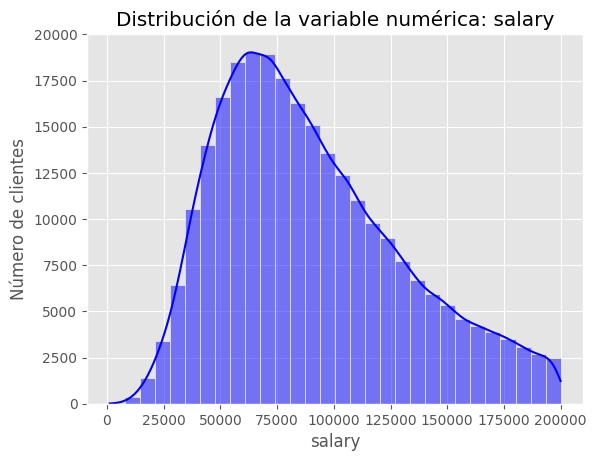

In [6]:
# tenemos en cuenta la gran cantidad de nulos que tenemos y por ello limitamos la gráfica por debajo de 2e+05, ya que si no, no se podría observar
# la distribución de manera clara

grafica(ultimo_mes_info[ultimo_mes_info['salary']<2e+05],'salary')  

In [7]:
nulos_salary = ultimo_mes_info[ultimo_mes_info['salary'].isna()][['country_id','age','entry_date','segment','salary','total_spend','days_since_last_purchase']]
nulos_salary

country_id  age entry_date             segment  salary  total_spend  \
1734413         ES   32 2019-05-01             Unknown     NaN          NaN   
1734416         ES   38 2019-03-01   02 - PARTICULARES     NaN         68.3   
1734420         ES   37 2018-12-01   02 - PARTICULARES     NaN         86.1   
1734426         ES   38 2019-03-01   02 - PARTICULARES     NaN         77.6   
1734427         ES   45 2019-01-01   02 - PARTICULARES     NaN         76.2   
...            ...  ...        ...                 ...     ...          ...   
2177389         ES   23 2016-08-01  03 - UNIVERSITARIO     NaN          NaN   
2177391         ES   23 2016-08-01  03 - UNIVERSITARIO     NaN          NaN   
2177396         ES   23 2016-08-01  03 - UNIVERSITARIO     NaN          NaN   
2177404         ES   47 2016-08-01   02 - PARTICULARES     NaN          NaN   
2177406         ES   37 2019-05-01             Unknown     NaN         77.5   

         days_since_last_purchase  
1734413                        31  
1734416                        61  
1734420                       151  
1734426                        92  
1734427                       120  
...                           ...  
2177389                       516  
2177391                       516  
2177396                       516  
2177404                       516  
2177406                        31  

[149527 rows x 7 columns]

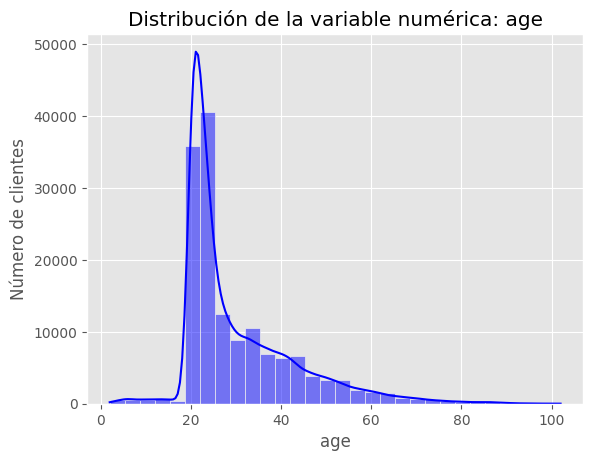

In [8]:
grafica(nulos_salary,'age')

Observamos que en el caso de los nulos de salary son bastante variados. Muchos de ellos pueden estar asociados a que, en el momento en el que se tomaron los datos, el cliente no tenía ningún salario. O que actualmente no lo tiene. Vamos a suponer que aquellos clientes menores de 25 años y mayores de 65 que no poseen salario no tienen, y por lo tanto imputaremos un cero a estos valores.

Para el resto de nulos, con la ayuda de un groupby que muestra la mediana del salary según una serie de variables, crearemos una columna cuyos valores serán los que imputemos. De este modo aportamos más variabilidad a la columna salary intentando afectar lo menos posible a la distribución.

In [9]:
condicion_edad =(ultimo_mes_info['salary'].isna()) & ((ultimo_mes_info['age']<25)|(ultimo_mes_info['age']>65))
ultimo_mes_info['salary'] = np.where(condicion_edad,0,ultimo_mes_info['salary'])

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17384\3759755479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultimo_mes_info['salary'] = np.where(condicion_edad,0,ultimo_mes_info['salary'])


In [10]:
# creamos el dataframe que nos muestra la mediana del salario según las diferentes variables que indiquemos
valores_imputar_salary = pd.DataFrame(ultimo_mes_info.groupby(['segment','age','entry_channel'])['salary'].median()).reset_index()
valores_imputar_salary.rename(columns={'salary': 'median_salary'}, inplace=True)
# unimos dicho dataframe a el dataframe original únicamente añadiendo la columna median_salary
ultimo_mes_info = ultimo_mes_info.merge(valores_imputar_salary, on=['segment','age','entry_channel'], how='left')
# imputamos los nulos de la columna original con los valores de median salary que coinciden en las variables usadas en el groupby
ultimo_mes_info['salary'] = ultimo_mes_info['salary'].fillna(ultimo_mes_info['median_salary'])
# eliminamos la columna median_salary
ultimo_mes_info.drop('median_salary', axis=1, inplace=True)

In [11]:
ultimo_mes_info['salary'].isna().sum()

2147

In [12]:
# a los nulos restantes les imputamos la mediana del salary
ultimo_mes_info['salary'] = np.where(ultimo_mes_info['salary'].isna(),ultimo_mes_info['salary'].median(),ultimo_mes_info['salary'])

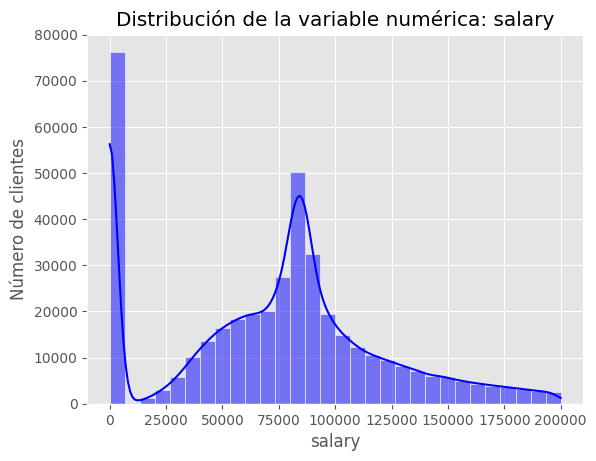

In [13]:
grafica(ultimo_mes_info[ultimo_mes_info['salary']<2e+05],'salary')  

Vemos que la distribución ha cambiado levemente. Es lógico que haya mucha gente sin sueldo y anteriormente este hecho no se estaba teniendo en cuena.

#### total_spend

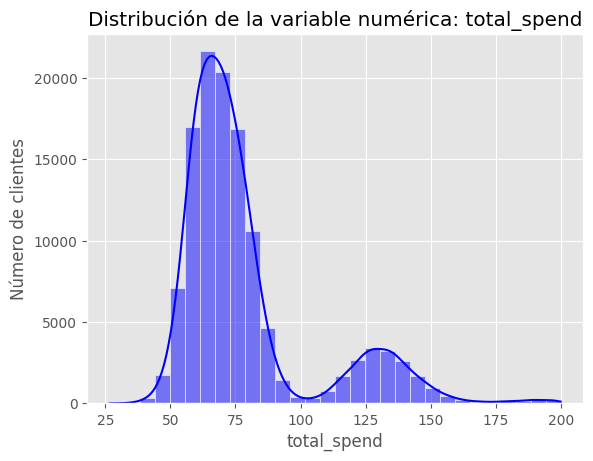

In [14]:
# tenemos en cuenta la gran cantidad de nulos que tenemos y por ello limitamos la gráfica por debajo de 200, ya que si no, no se podría observar
# la distribución de manera clara
grafica(ultimo_mes_info[ultimo_mes_info['total_spend']<200],'total_spend')

Tenemos varias columnas que nos pueden ayudar a imputar los nulos de esta columna.
- product_posesion: indica si alguna vez el cliente ha tenido en posesión un producto. En caso de que sea False, asignamos un 0 a total_spend
- max_products: indica el máximo de productos que ha tenido el cliente en todo su historial. En caso de que sea 1, asignar el precio de dicho producto a
                total_spend.
- las columnas spent_on_product pueden ayudarnos también en esta tarea

In [15]:
# tenemos una columna que nos indica si el cliente ha tenido en posesión alguna vez algún producto y otra
# que nos informa del máximo número de productos de los que han tenido posesión

In [16]:
condicion1 = (ultimo_mes_info['total_spend'].isna())&(ultimo_mes_info['max_products']==0)
condicion2 = (ultimo_mes_info['total_spend'].isna())&(ultimo_mes_info['max_products']==1)
ultimo_mes_info['total_spend_casero'] = ultimo_mes_info[['spent_on_account', 'spent_on_payment_card', 'spent_on_pension_plan', 'spent_on_investment','spent_on_loan']].sum(axis=1, skipna=True)

ultimo_mes_info['total_spend'] = np.where(condicion1,0,ultimo_mes_info['total_spend'])
ultimo_mes_info['total_spend'] = np.where(condicion2,ultimo_mes_info['total_spend_casero'],ultimo_mes_info['total_spend'])
# tras estas imputaciones nos siguen quedando un total de 23212 nulos

In [17]:
# creamos el dataframe que nos muestra la media de total_spend según las diferentes variables que indiquemos
valores_imputar_total_spend = pd.DataFrame(ultimo_mes_info.groupby(['segment','age','max_products'])['total_spend'].mean()).reset_index()
valores_imputar_total_spend.rename(columns={'total_spend': 'mean_total_spend'}, inplace=True)

# unimos dicho dataframe a el dataframe original únicamente añadiendo la columna mean_total_spend
ultimo_mes_info = ultimo_mes_info.merge(valores_imputar_total_spend, on=['segment','age','max_products'], how='left')

# imputamos los nulos de la columna original con los valores de mean_total_spend que coinciden en las variables usadas en el groupby
ultimo_mes_info['total_spend'] = ultimo_mes_info['total_spend'].fillna(ultimo_mes_info['mean_total_spend'])

# eliminamos la columna mean_total_spend
ultimo_mes_info.drop('mean_total_spend', axis=1, inplace=True)
ultimo_mes_info.drop('total_spend_casero', axis=1, inplace=True)

# nos siguen quedando 83 nulos tras la imputación asi que volvemos a repetir el proceso pero diversificando menos

In [18]:
valores_imputar_total_spend2 = pd.DataFrame(ultimo_mes_info.groupby(['max_products'])['total_spend'].mean()).reset_index()
valores_imputar_total_spend2.rename(columns={'total_spend': 'mean_total_spend2'}, inplace=True)
ultimo_mes_info = ultimo_mes_info.merge(valores_imputar_total_spend2, on=['max_products'], how='left')
ultimo_mes_info['total_spend'] = ultimo_mes_info['total_spend'].fillna(ultimo_mes_info['mean_total_spend2'])
ultimo_mes_info.drop('mean_total_spend2', axis=1, inplace=True)
ultimo_mes_info['total_spend'].isna().sum()

0

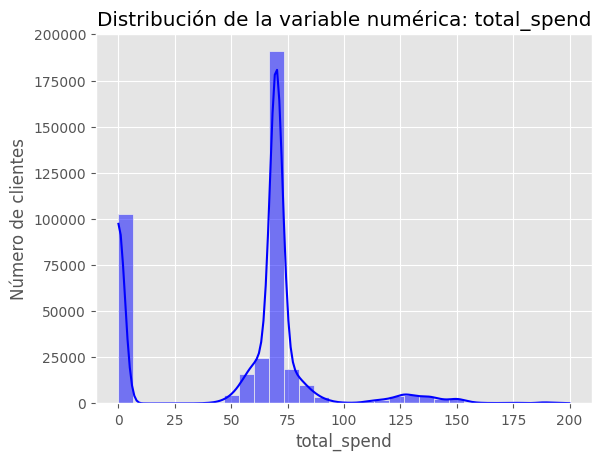

In [19]:
grafica(ultimo_mes_info[ultimo_mes_info['total_spend']<200],'total_spend')

<a id='selec_cols'></a>
## Selección de columnas 
[Volver al índice](#index)

En este apartado seleccionamos aquellas columnas por la cuales queremos que se clustericen nuestros clientes. Como nos vamos a centrar en identificar clientes según sus características sociodemográficas, por el tipo de productos que consumen (independientemente del tiempo que tengan contratado cada uno) y por el tiempo que han formado parte de la empresa, vamos a eliminar todas las variables enfocadas en los productos como aquellas que están relacionadas con otras variables.


In [20]:
variables_relacionadas = ['age_group','salary_bracket','region_code','has_account','days_since_last_purchase','product_posesion']

fechas = ['pk_partition','entry_date','ultima_compra']

productos = ['em_acount', 'debit_card', 'pension_plan', 'payroll',
       'payroll_account', 'emc_account', 'credit_card','short_term_deposit', 'long_term_deposit', 'securities', 'funds',
       'loans', 'mortgage','em_account_p','em_account_pp']

continuidad_productos = ['em_acount_consecutive_months','debit_card_consecutive_months','pension_plan_consecutive_months','payroll_consecutive_months',
                         'payroll_account_consecutive_months','emc_account_consecutive_months','credit_card_consecutive_months','short_term_deposit_consecutive_months',
                         'long_term_deposit_consecutive_months','securities_consecutive_months','funds_consecutive_months','loans_consecutive_months',
                         'mortgage_consecutive_months']

spent_per_family = ['spent_on_account','spent_on_payment_card','spent_on_pension_plan','spent_on_investment','spent_on_loan'] 
columnas_eliminar = variables_relacionadas + fechas + productos + continuidad_productos + spent_per_family

In [21]:
df = ultimo_mes_info.drop(columns=columnas_eliminar)
df = df.set_index('pk_cid')
df.head()

country_id gender  age deceased      salary  total_products  \
pk_cid                                                               
657826         ES      H   44        N   54493.380               1   
657817         ES      V   32        N  114175.890               0   
657986         ES      H   39        N  100993.170               6   
657905         ES      H   85        N  154059.090               2   
657336         ES      V   38        N   87348.345               1   

        total_products_no_account  has_payment_card  has_pension_plan  \
pk_cid                                                                  
657826                          0                 0                 0   
657817                          0                 0                 0   
657986                          3                 1                 1   
657905                          1                 0                 0   
657336                          0                 0                 0   

        has_investment  has_loan  has_credit_card_debt  num_accounts  \
pk_cid                                                                 
657826               0         0                     0             1   
657817               0         0                     0             0   
657986               0         0                     1             3   
657905               1         0                     0             1   
657336               0         0                     0             1   

        num_debt_products entry_channel  active_customer            segment  \
pk_cid                                                                        
657826                  0           013              1.0  02 - PARTICULARES   
657817                  0       Unknown              0.0            Unknown   
657986                  1           KAF              1.0  02 - PARTICULARES   
657905                  0           KAT              1.0           01 - TOP   
657336                  0           KAT              1.0  02 - PARTICULARES   

        meses_antigüedad  total_spend  months_since_last_purchase  \
pk_cid                                                              
657826                48    69.970000                          17   
657817                 0     0.000000                           1   
657986                39    64.500000                           2   
657905                27  1428.906667                          17   
657336                 2    68.300000                           2   

        max_products  
pk_cid                
657826             1  
657817             0  
657986             6  
657905             2  
657336             1

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442995 entries, 657826 to 1550586
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   country_id                  442995 non-null  object 
 1   gender                      442995 non-null  object 
 2   age                         442995 non-null  int64  
 3   deceased                    442995 non-null  object 
 4   salary                      442995 non-null  float64
 5   total_products              442995 non-null  int64  
 6   total_products_no_account   442995 non-null  int64  
 7   has_payment_card            442995 non-null  int64  
 8   has_pension_plan            442995 non-null  int32  
 9   has_investment              442995 non-null  int64  
 10  has_loan                    442995 non-null  int64  
 11  has_credit_card_debt        442995 non-null  int64  
 12  num_accounts                442995 non-null  int64  
 13  num_debt_prod

<a id='analisis_univar'></a>
## Análisis Univariante 
[Volver al índice](#index)

En este apartado realizamos un pequeño procesamiento de variables que lo necesitan y analizamos la distribución de cada variable para determinar si aportan o no variabilidad al modelo de KMeans, para que este sea capaz de desarrollar clusters en base a dichas variables.

In [23]:
def distribucion_variable(df, column):
    """
    Esta función genera un gráfico que muestra la distribución de una variable,
    ya sea numérica o categórica. El gráfico puede ser un histograma o un gráfico de conteo.
    
    Parámetros:
    df (DataFrame): El DataFrame que contiene los datos.
    column (str): El nombre de la columna que se quiere graficar.
    """
    plt.figure(figsize=(6, 4))
    
    if df[column].dtype == 'object' or df[column].nunique() < 10:  # Si es categórica o tiene pocas categorías
        sns.countplot(data=df, x=column, hue=column, palette= sns.color_palette("tab10"))
        plt.title(f'Distribución de la variable categórica: {column}')
        plt.ylabel('Número de clientes')
        plt.xlabel(column)
    else:  # Si es numérica
        sns.histplot(df[column], kde=True, color='b', bins=30)
        plt.title(f'Distribución de la variable numérica: {column}')
        plt.ylabel('Número de clientes')
        plt.xlabel(column)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show();

In [24]:
no_explicativas = []

Hacemos un preprocesamiento de aquellas variables que sabemos que tienen muchas categorías u otros defectos.

In [25]:
df['segment'] = np.where(df['segment']=='03 - UNIVERSITARIO','Universitario',df['segment'])
df['segment'] = np.where(df['segment']=='02 - PARTICULARES','Particulares',df['segment'])
df['segment'] = np.where(df['segment']=='01 - TOP','Top',df['segment'])

In [26]:
def setOthers(dataframe, column, min_count):
    """
    Esta función toma una columna categórica en un DataFrame y reemplaza aquellas categorías cuya frecuencia es 
    menor que un umbral especificado (`min_count`) con la categoría 'Others'. Luego, la columna se convierte en 
    un tipo categórico con las categorías filtradas y 'Others'. Finalmente, las categorías no especificadas 
    explícitamente son reemplazadas por 'Others'.

    Parámetros:
    df (pd.DataFrame): El DataFrame que contiene la columna a transformar.
    columna (str): El nombre de la columna en el DataFrame que queremos transformar.
    min_count (int): El umbral de frecuencia mínima, es decir, el número mínimo de máquinas que una categoría debe tener para no ser agrupada en 'Others'.
    
    Retorna:
    pd.Series: Una Serie con la columna transformada, donde las categorías con frecuencia menor que `min_count` se han agrupado bajo 'Others'.
    """
    # Obtener el recuento de valores de la columna
    value_counts = dataframe[column].value_counts()
    # Filtrar las categorías que superan el umbral (min_count)
    top_categories = value_counts[value_counts >= min_count].index.to_list()
    # Añadir la categoría 'Others' al listado
    top_categories.append('Others')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories)
    # asignar a los nulos (categorías que no se encuentran en el top_categories) la categoría Others
    dataframe[column] = dataframe[column].fillna('Others')
    return dataframe[column]

In [27]:
setOthers(df, 'country_id', 100)
setOthers(df, 'entry_channel', 1000)

pk_cid
657826      Others
657817     Unknown
657986      Others
657905         KAT
657336         KAT
            ...   
1166765        KHE
1166764        KHE
1166763        KHE
1166789        KHE
1550586    Unknown
Name: entry_channel, Length: 442995, dtype: category
Categories (15, object): ['KHE', 'KHQ', 'KFC', 'KHM', ..., 'KHL', 'KHF', 'KHO', 'Others']

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442995 entries, 657826 to 1550586
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   country_id                  442995 non-null  category
 1   gender                      442995 non-null  object  
 2   age                         442995 non-null  int64   
 3   deceased                    442995 non-null  object  
 4   salary                      442995 non-null  float64 
 5   total_products              442995 non-null  int64   
 6   total_products_no_account   442995 non-null  int64   
 7   has_payment_card            442995 non-null  int64   
 8   has_pension_plan            442995 non-null  int32   
 9   has_investment              442995 non-null  int64   
 10  has_loan                    442995 non-null  int64   
 11  has_credit_card_debt        442995 non-null  int64   
 12  num_accounts                442995 non-null  int64   
 13

In [29]:
df = df.reset_index()

### country_id

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17384\437199347.py:13: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, hue=column, palette= sns.color_palette("tab10"))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


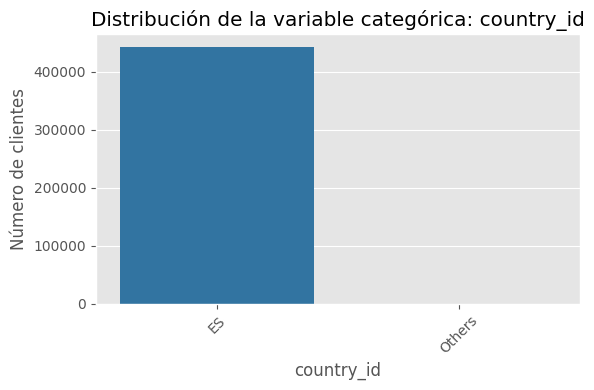

In [30]:
distribucion_variable(df, 'country_id')

In [31]:
df['country_id'].value_counts()

country_id
ES        442833
Others       162
Name: count, dtype: int64

In [32]:
no_explicativas.append('country_id')

### gender

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17384\437199347.py:13: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, hue=column, palette= sns.color_palette("tab10"))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


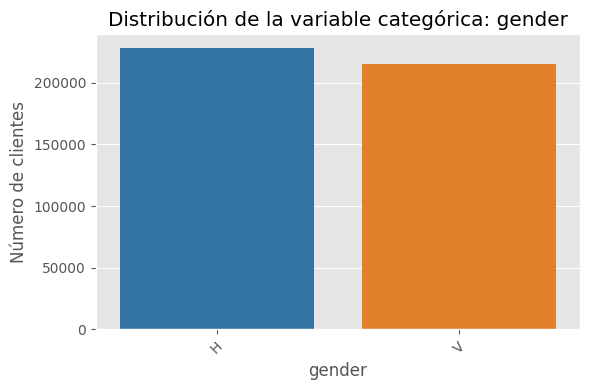

In [33]:
distribucion_variable(df, 'gender')

### age

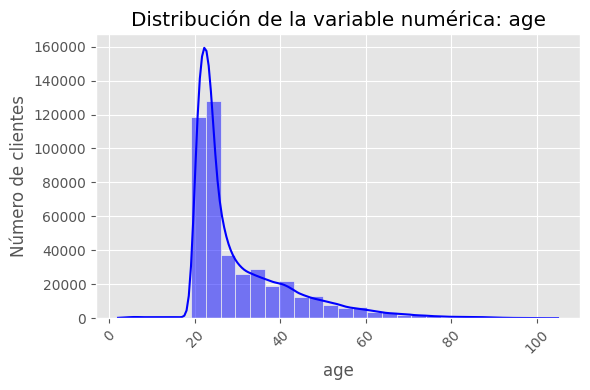

In [34]:
distribucion_variable(df, 'age')

In [35]:
df['age'].describe()

count    442995.000000
mean         30.401639
std          12.239800
min           2.000000
25%          22.000000
50%          25.000000
75%          35.000000
max         105.000000
Name: age, dtype: float64

Vemos que hay cuentas para menores de edad, las cuales imaginamos que han sido creadas por los padres a nombre del niño donde le irán metiendo dinero mensualmente para ahorrar.

### deceased

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17384\437199347.py:13: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, hue=column, palette= sns.color_palette("tab10"))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


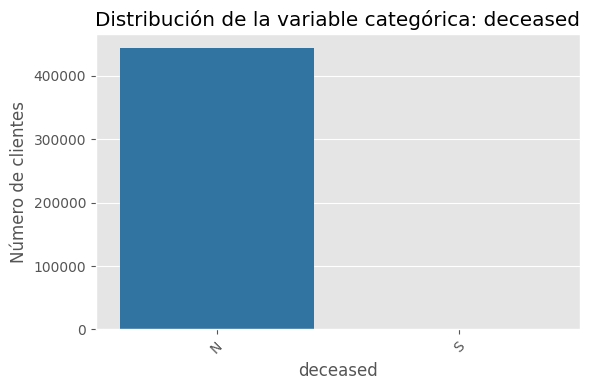

In [36]:
distribucion_variable(df, 'deceased')

In [37]:
no_explicativas.append('deceased')

### salary

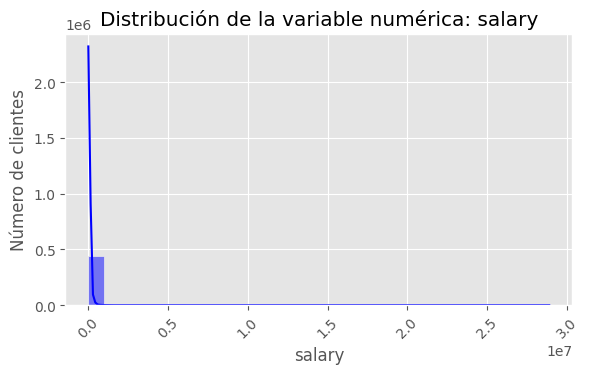

In [38]:
distribucion_variable(df, 'salary')

In [39]:
df['salary'].describe()

count    4.429950e+05
mean     9.176775e+04
std      1.743130e+05
min      0.000000e+00
25%      4.687162e+04
50%      8.138954e+04
75%      1.083317e+05
max      2.889440e+07
Name: salary, dtype: float64

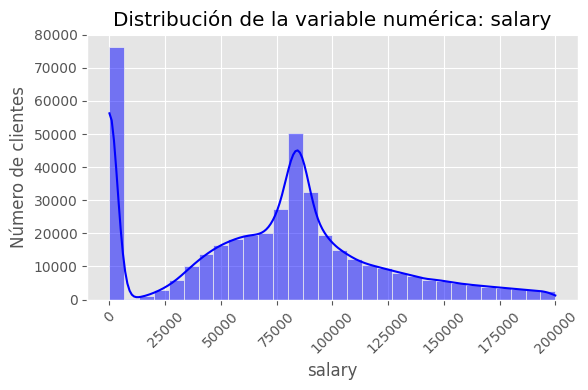

In [40]:
distribucion_variable(df[df['salary']<2e+05], 'salary')

### total_products

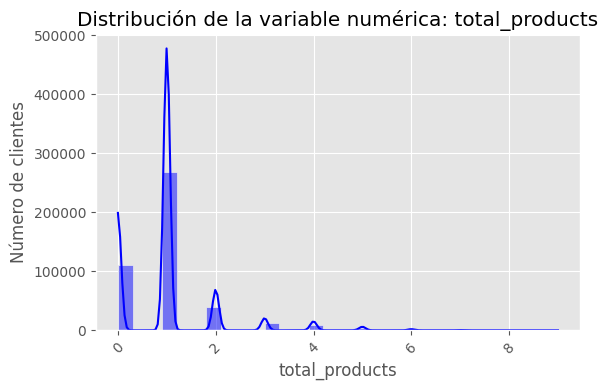

In [41]:
distribucion_variable(df, 'total_products')

In [42]:
df['total_products'].value_counts()

total_products
1    268286
0    111407
2     38714
3     11502
4      8479
5      3342
6      1038
7       194
8        31
9         2
Name: count, dtype: int64

### total_products_no_account

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17384\437199347.py:13: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.countplot(data=df, x=column, hue=column, palette= sns.color_palette("tab10"))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-pack

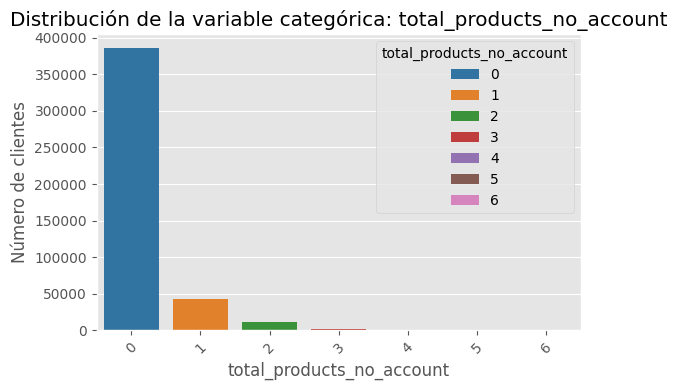

In [43]:
distribucion_variable(df, 'total_products_no_account')

In [44]:
df['total_products_no_account'].value_counts()

total_products_no_account
0    385479
1     43092
2     11954
3      2211
4       228
5        28
6         3
Name: count, dtype: int64

### has_payment_card

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17384\437199347.py:13: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, hue=column, palette= sns.color_palette("tab10"))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


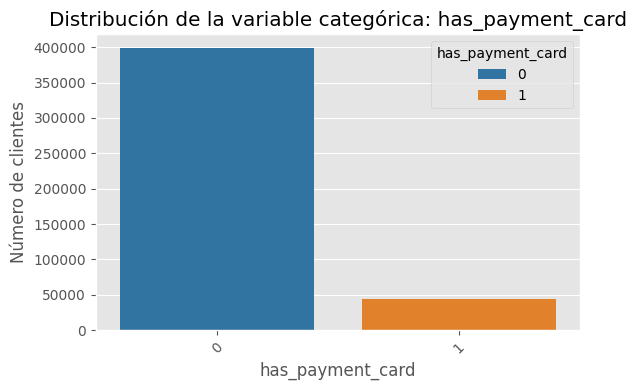

In [45]:
distribucion_variable(df, 'has_payment_card')

In [46]:
df['has_payment_card'].value_counts()

has_payment_card
0    398134
1     44861
Name: count, dtype: int64

### has_pension_plan

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17384\437199347.py:13: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, hue=column, palette= sns.color_palette("tab10"))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


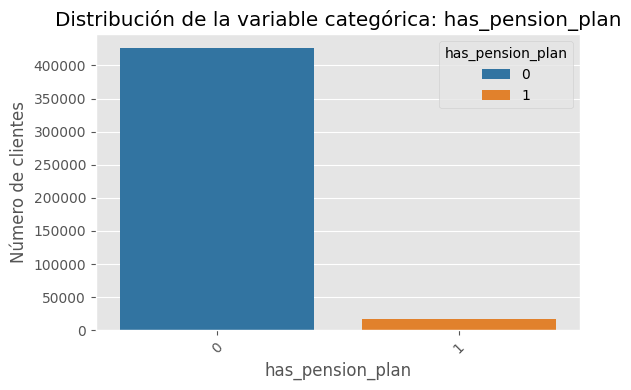

In [47]:
distribucion_variable(df, 'has_pension_plan')

In [48]:
df['has_pension_plan'].value_counts()

has_pension_plan
0    425642
1     17353
Name: count, dtype: int64

In [49]:
no_explicativas.append('has_pension_plan')

### has_investment

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17384\437199347.py:13: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, hue=column, palette= sns.color_palette("tab10"))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


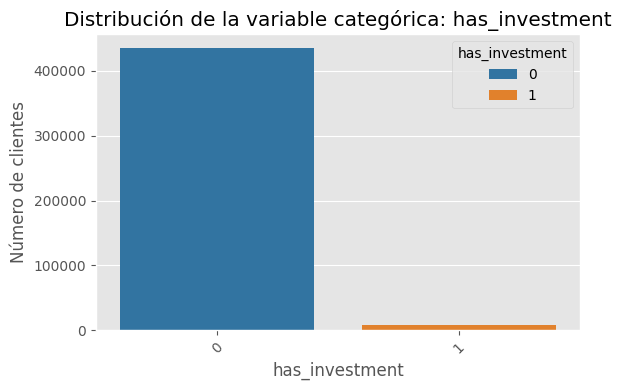

In [50]:
distribucion_variable(df, 'has_investment')

In [51]:
no_explicativas.append('has_investment')

### has_loan

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17384\437199347.py:13: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, hue=column, palette= sns.color_palette("tab10"))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


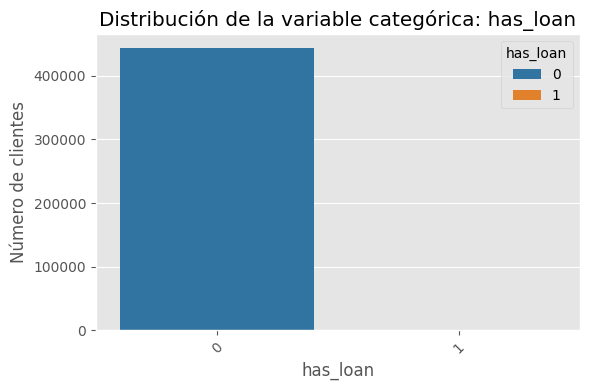

In [52]:
distribucion_variable(df, 'has_loan')

In [53]:
no_explicativas.append('has_loan')

### has_credit_card_debt

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17384\437199347.py:13: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, hue=column, palette= sns.color_palette("tab10"))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


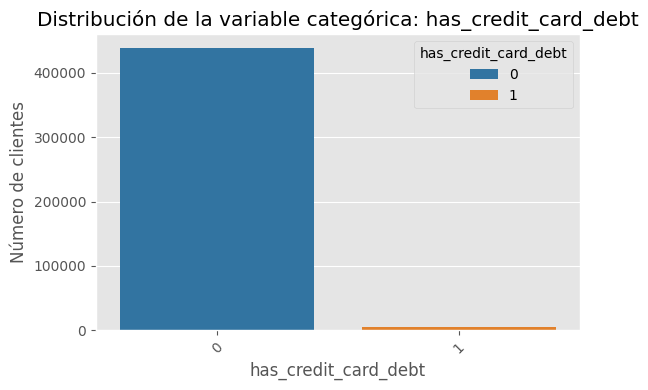

In [54]:
distribucion_variable(df, 'has_credit_card_debt')

In [55]:
no_explicativas.append('has_credit_card_debt')

### num_accounts

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17384\437199347.py:13: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(data=df, x=column, hue=column, palette= sns.color_palette("tab10"))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-pack

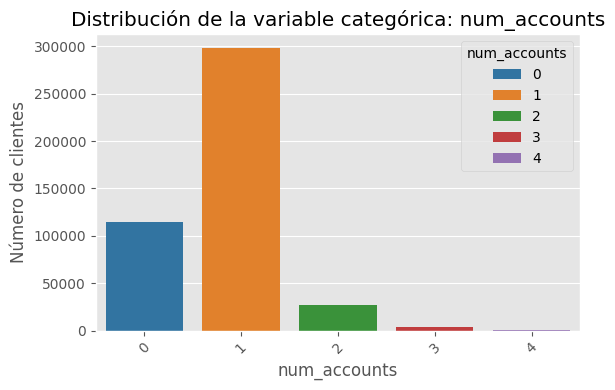

In [56]:
distribucion_variable(df, 'num_accounts')

### num_debt_products

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17384\437199347.py:13: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(data=df, x=column, hue=column, palette= sns.color_palette("tab10"))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-pack

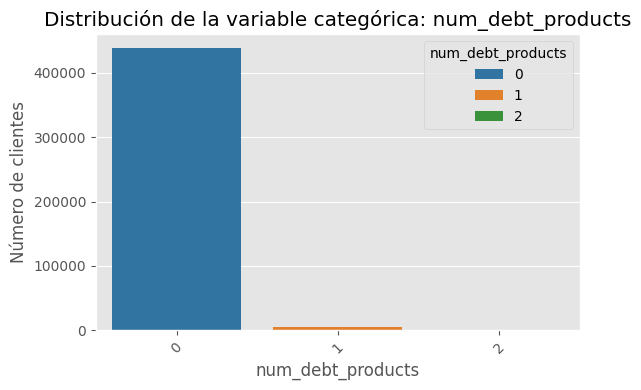

In [57]:
distribucion_variable(df, 'num_debt_products')

In [58]:
no_explicativas.append('num_debt_products')

### entry_channel

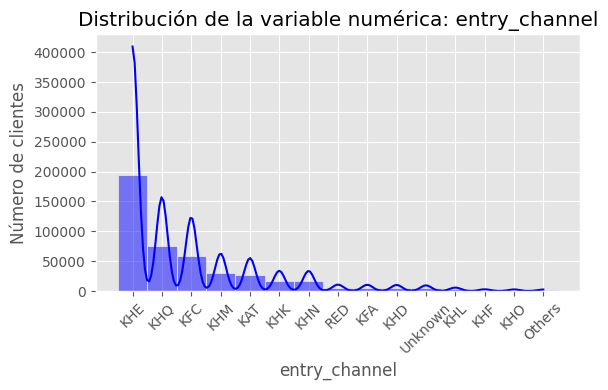

In [59]:
distribucion_variable(df, 'entry_channel') 

### active_customer

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17384\437199347.py:13: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, hue=column, palette= sns.color_palette("tab10"))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


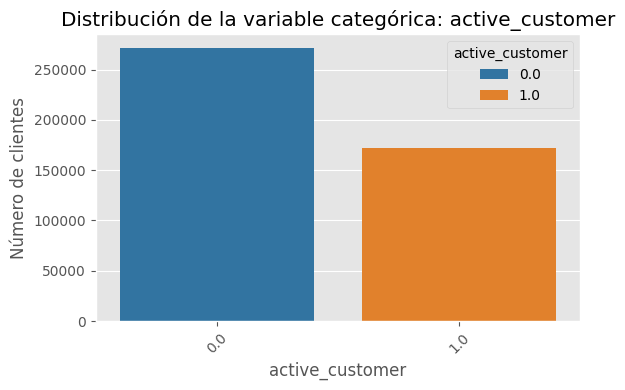

In [60]:
distribucion_variable(df, 'active_customer')

### segment

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17384\437199347.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(data=df, x=column, hue=column, palette= sns.color_palette("tab10"))
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-pack

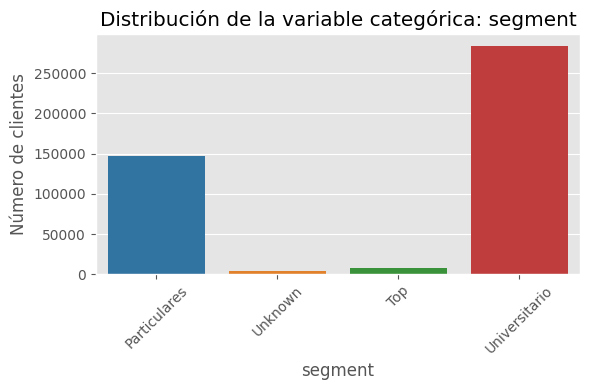

In [61]:
distribucion_variable(df, 'segment')

### meses_antigüedad

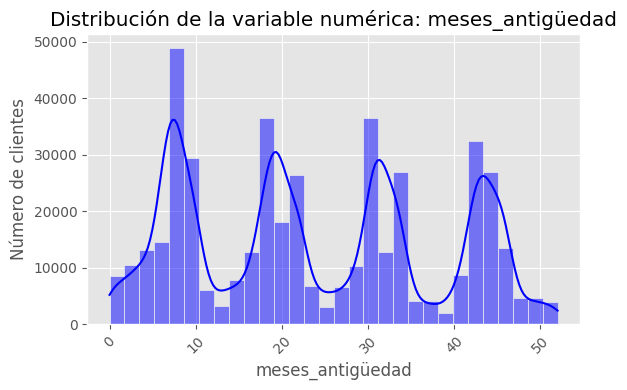

In [62]:
distribucion_variable(df, 'meses_antigüedad')

### total_spend

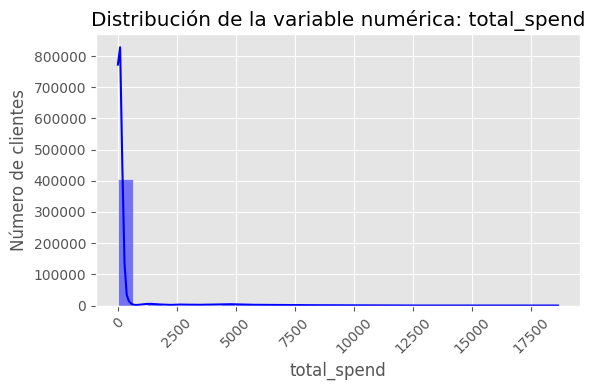

In [63]:
distribucion_variable(df, 'total_spend') 

In [64]:
df['total_spend'].describe()

count    442995.000000
mean        426.714192
std        1431.168661
min           0.000000
25%          54.900000
50%          69.970000
75%          71.000000
max       18649.900000
Name: total_spend, dtype: float64

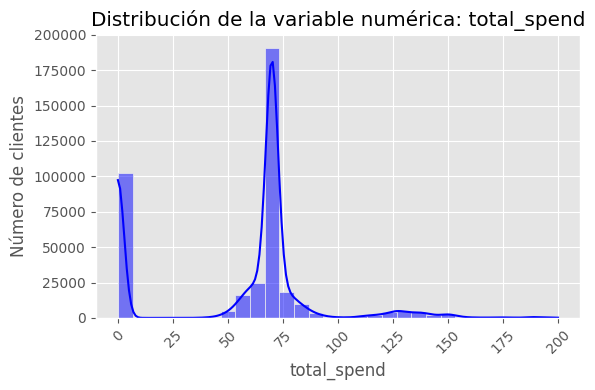

In [65]:
distribucion_variable(df[df['total_spend']<200], 'total_spend')

### months_since_last_purchase

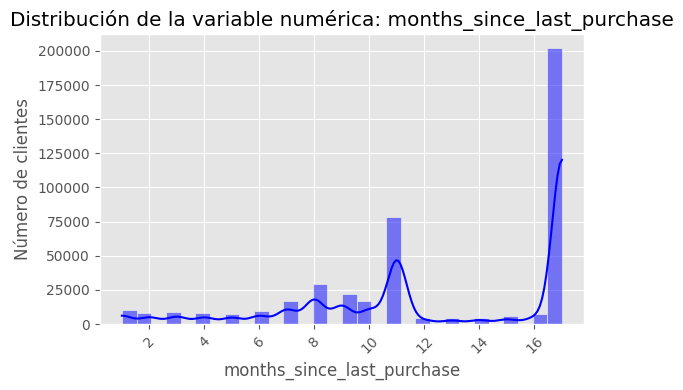

In [66]:
distribucion_variable(df, 'months_since_last_purchase')

Esta variable no asigna de manera correcta los meses a aquellas personas que no han realizado ninguna compra. Es por ello que la vamos a modificar de manera que a las personas que no han realizado ninguna compra se les asigne un -1 en esta variable

In [67]:
df['months_since_last_purchase'] = np.where(df['max_products']==0,-1,df['months_since_last_purchase'])

In [ ]:
df['months_since_last_purchase'].describe()

count    442995.000000
mean         10.176146
std           7.393216
min          -1.000000
25%           2.000000
50%          12.000000
75%          17.000000
max          17.000000
Name: months_since_last_purchase, dtype: float64

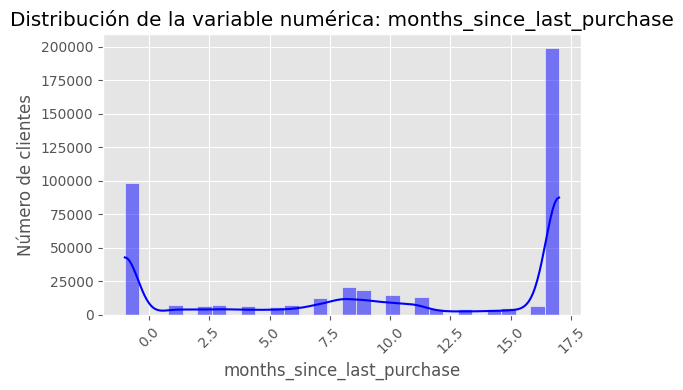

In [69]:
distribucion_variable(df, 'months_since_last_purchase')

### max_products

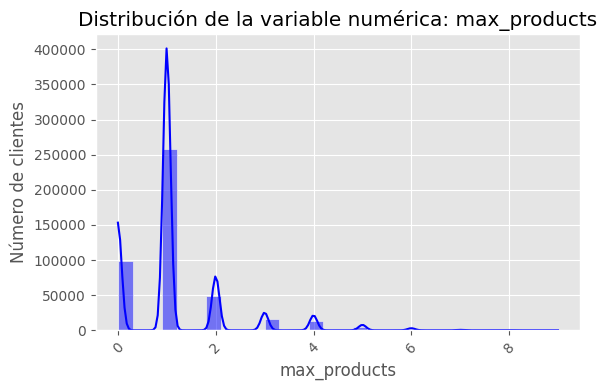

In [70]:
distribucion_variable(df, 'max_products')

In [71]:
df['max_products'].value_counts()

max_products
1    257996
0     98291
2     49524
3     16199
4     13664
5      4960
6      1873
7       390
8        87
9        11
Name: count, dtype: int64

In [72]:
no_explicativas.append('max_products')

<a id='procesamiento'></a>
# Procesamiento del dataset 
[Volver al índice](#index)

En este apartado eliminamos aquellas variables que hemos considerado no explicativas a la hora de crear los clusters e implementamos un OHE a aquellas variables categóricas y un RobustScaler a todas para que las distancias sean adecuadas para que lo lea KMeans, de modo que no priorice unas variables frente a otras.

In [73]:
df_clientes = df.drop(columns=no_explicativas)

In [74]:
dataset_grupos = df_clientes.copy()

In [75]:
df_clientes = df_clientes.set_index('pk_cid')

In [76]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442995 entries, 657826 to 1550586
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   gender                      442995 non-null  object  
 1   age                         442995 non-null  int64   
 2   salary                      442995 non-null  float64 
 3   total_products              442995 non-null  int64   
 4   total_products_no_account   442995 non-null  int64   
 5   has_payment_card            442995 non-null  int64   
 6   num_accounts                442995 non-null  int64   
 7   entry_channel               442995 non-null  category
 8   active_customer             442995 non-null  float64 
 9   segment                     442995 non-null  object  
 10  meses_antigüedad            442995 non-null  int64   
 11  total_spend                 442995 non-null  float64 
 12  months_since_last_purchase  442995 non-null  int64   
dty

In [77]:
# One-Hot Encoding para variables categóricas
df_clientes = pd.get_dummies(df_clientes, columns=['entry_channel', 'gender', 'segment'])

In [78]:
pipe = Pipeline(steps = [
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0)))
])

In [79]:
df_clientes_transformed = pipe.fit_transform(df_clientes)

In [80]:
df_clientes_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442995 entries, 657826 to 1550586
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   age                         442995 non-null  float64
 1   salary                      442995 non-null  float64
 2   total_products              442995 non-null  float64
 3   total_products_no_account   442995 non-null  float64
 4   has_payment_card            442995 non-null  float64
 5   num_accounts                442995 non-null  float64
 6   active_customer             442995 non-null  float64
 7   meses_antigüedad            442995 non-null  float64
 8   total_spend                 442995 non-null  float64
 9   months_since_last_purchase  442995 non-null  float64
 10  entry_channel_KHE           442995 non-null  float64
 11  entry_channel_KHQ           442995 non-null  float64
 12  entry_channel_KFC           442995 non-null  float64
 13  entry_channel

In [81]:
df_clientes_transformed.head()

age    salary  total_products  total_products_no_account  \
pk_cid                                                                  
657826  0.263889 -0.063572             0.0                        0.0   
657817  0.097222  0.077494            -0.2                        0.0   
657986  0.194444  0.046335             1.0                        1.5   
657905  0.833333  0.171762             0.2                        0.5   
657336  0.180556  0.014084             0.0                        0.0   

        has_payment_card  num_accounts  active_customer  meses_antigüedad  \
pk_cid                                                                      
657826               0.0           0.0              1.0              0.52   
657817               0.0          -0.5              0.0             -0.44   
657986               1.0           1.0              1.0              0.34   
657905               0.0           0.0              1.0              0.10   
657336               0.0           0.0              1.0             -0.40   

        total_spend  months_since_last_purchase  entry_channel_KHE  \
pk_cid                                                               
657826     0.000000                    0.277778                0.0   
657817    -0.009141                   -0.722222                0.0   
657986    -0.000715                   -0.555556                0.0   
657905     0.177541                    0.277778                0.0   
657336    -0.000218                   -0.555556                0.0   

        entry_channel_KHQ  entry_channel_KFC  entry_channel_KHM  \
pk_cid                                                            
657826                0.0                0.0                0.0   
657817                0.0                0.0                0.0   
657986                0.0                0.0                0.0   
657905                0.0                0.0                0.0   
657336                0.0                0.0                0.0   

        entry_channel_KAT  entry_channel_KHK  entry_channel_KHN  \
pk_cid                                                            
657826                0.0                0.0                0.0   
657817                0.0                0.0                0.0   
657986                0.0                0.0                0.0   
657905                1.0                0.0                0.0   
657336                1.0                0.0                0.0   

        entry_channel_RED  entry_channel_KFA  entry_channel_KHD  \
pk_cid                                                            
657826                0.0                0.0                0.0   
657817                0.0                0.0                0.0   
657986                0.0                0.0                0.0   
657905                0.0                0.0                0.0   
657336                0.0                0.0                0.0   

        entry_channel_Unknown  entry_channel_KHL  entry_channel_KHF  \
pk_cid                                                                
657826                    0.0                0.0                0.0   
657817                    1.0                0.0                0.0   
657986                    0.0                0.0                0.0   
657905                    0.0                0.0                0.0   
657336                    0.0                0.0                0.0   

        entry_channel_KHO  entry_channel_Others  gender_H  gender_V  \
pk_cid                                                                
657826                0.0                   1.0       0.0       0.0   
657817                0.0                   0.0      -1.0       1.0   
657986                0.0                   1.0       0.0       0.0   
657905                0.0                   0.0       0.0       0.0   
657336                0.0                   0.0      -1.0       1.0   

        segment_Particulares  segment_Top  segment_Universitario

# KMeans

<a id='elbow'></a>
## Elbow curve 
[Volver al índice](#index)

En este apartado vamos a graficar la *Elbow Curve* la cual utiliza los valores de la inercia obtenidos tras aplicar el K-means a diferente número de Clusters (en nuestro caso desde 1 a 15 Clusters), siendo la inercia la suma de las distancias al cuadrado de cada objeto del Cluster a su centroide.

Una vez obtenidos los valores de la inercia tras aplicar el K-means de 1 a 15 Clusters, representamos en una gráfica lineal la inercia respecto del número de Clusters. En esta gráfica se debería de apreciar un cambio brusco en la evolución de la inercia, teniendo la línea representada una forma similar a la de un brazo y su codo. El punto en el que se observa ese cambio brusco en la inercia nos dirá el número óptimo de Clusters a seleccionar para ese data set.

In [82]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k,random_state = 44)
    clustering_model.fit(df_clientes_transformed)

    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


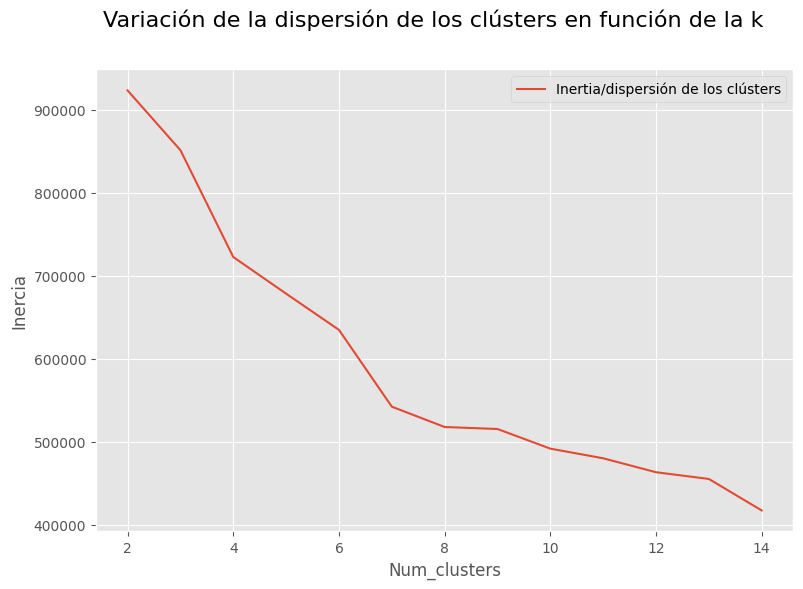

In [83]:
fig = plt.figure(figsize = (9, 6))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16)

# Añadir etiquetas a los ejes
ax.set_xlabel("Num_clusters", fontsize=12)
ax.set_ylabel("Inercia", fontsize=12)

# Añadir la leyenda
ax.legend()

# Mostrar la gráfica
plt.show();

<a id='final'></a>
## Segmentación final 
[Volver al índice](#index)

En este apartado finalmente aplicamos el algoritmo KMeans con el número adecuado de clusters, en este caso 7, y analizamos cada uno de ellos mediante diversas funciones que nos aportan gráficos e información relevante de cada uno de ellos.

In [84]:
kmeans = KMeans(n_clusters = 7, random_state = 44)

In [85]:
kmeans.fit(df_clientes_transformed) 

KMeans(n_clusters=7, random_state=44)

In [86]:
df_clientes_transformed['cluster'] = kmeans.labels_
grupos = df_clientes_transformed[['cluster']]

In [87]:
grupos = grupos.reset_index()
grupos

pk_cid  cluster
0        657826        2
1        657817        0
2        657986        4
3        657905        2
4        657336        0
...         ...      ...
442990  1166765        6
442991  1166764        6
442992  1166763        2
442993  1166789        1
442994  1550586        2

[442995 rows x 2 columns]

In [88]:
grupos.to_pickle('pk_cid_cluster.pkl')

In [88]:
# a este dataset le podemos unir toda la información que queramos del dataset inicial de ultimo_mes_info
dataset_grupos = dataset_grupos.merge(grupos,on='pk_cid')

In [89]:
dataset_grupos = dataset_grupos.merge(ultimo_mes_info[['pk_cid']+productos],on='pk_cid')
dataset_grupos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442995 entries, 0 to 442994
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   pk_cid                      442995 non-null  int64   
 1   gender                      442995 non-null  object  
 2   age                         442995 non-null  int64   
 3   salary                      442995 non-null  float64 
 4   total_products              442995 non-null  int64   
 5   total_products_no_account   442995 non-null  int64   
 6   has_payment_card            442995 non-null  int64   
 7   num_accounts                442995 non-null  int64   
 8   entry_channel               442995 non-null  category
 9   active_customer             442995 non-null  float64 
 10  segment                     442995 non-null  object  
 11  meses_antigüedad            442995 non-null  int64   
 12  total_spend                 442995 non-null  float64 
 13 

In [90]:
dataset_grupos['cluster'].value_counts()

cluster
1    112408
6     84236
0     70897
2     53271
5     45071
4     40921
3     36191
Name: count, dtype: int64

In [91]:
dataset_grupos = dataset_grupos.set_index('pk_cid')

In [93]:
dataset_grupos.head()

gender  age      salary  total_products  total_products_no_account  \
pk_cid                                                                      
657826      H   44   54493.380               1                          0   
657817      V   32  114175.890               0                          0   
657986      H   39  100993.170               6                          3   
657905      H   85  154059.090               2                          1   
657336      V   38   87348.345               1                          0   

        has_payment_card  num_accounts entry_channel  active_customer  \
pk_cid                                                                  
657826                 0             1        Others              1.0   
657817                 0             0       Unknown              0.0   
657986                 1             3        Others              1.0   
657905                 0             1           KAT              1.0   
657336                 0             1           KAT              1.0   

             segment  meses_antigüedad  total_spend  \
pk_cid                                                
657826  Particulares                48    69.970000   
657817       Unknown                 0     0.000000   
657986  Particulares                39    64.500000   
657905           Top                27  1428.906667   
657336  Particulares                 2    68.300000   

        months_since_last_purchase  cluster  em_acount  debit_card  \
pk_cid                                                               
657826                          17        2          1           0   
657817                          -1        0          0           0   
657986                           2        4          0           1   
657905                          17        2          1           0   
657336                           2        0          1           0   

        pension_plan  payroll  payroll_account  emc_account  credit_card  \
pk_cid                                                                     
657826             0        0                0            0            0   
657817             0        0                0            0            0   
657986             1        1                1            1            1   
657905             0        0                0            0            0   
657336             0        0                0            0            0   

        short_term_deposit  long_term_deposit  securities  funds  loans  \
pk_cid                                                                    
657826                   0                  0           0      0      0   
657817                   0                  0           0      0      0   
657986                   0                  0           0      0      0   
657905                   0                  1           0      0      0   
657336                   0                  0           0      0      0   

        mortgage  em_account_p  em_account_pp  
pk_cid                                         
657826         0             0              0  
657817         0             0              0  
657986         0             0              0  
657905         0             0              0  
657336         0             0              0

In [94]:
dataset_grupos['gender'] = np.where(dataset_grupos['gender']=='V','Masculino','Femenino')

### Análisis de cada grupo

In [95]:
def analizar_cluster_graficas(df, cluster_num):
    # Filtrar el DataFrame por el cluster seleccionado
    df_cluster = df[df['cluster'] == cluster_num]
    
    # Crear la figura con subplots (6 filas y 2 columnas)
    fig, axes = plt.subplots(7, 2, figsize=(15, 20))
    fig.suptitle(f'Análisis del Cluster {cluster_num}', fontsize=20)

    # 1. Gráfico tipo pie para gender
    df_cluster['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'pink'], ax=axes[0, 0])
    axes[0, 0].set_title('Género')
    axes[0, 0].set_ylabel('')

    # 2. Gráfico de distribución para age
    sns.histplot(df_cluster['age'], kde=True, color='blue', ax=axes[0, 1])
    axes[0, 1].set_title('Edad')

    # 3. Gráfico countplot para total_products
    sns.countplot(x='total_products', data=df_cluster, hue='total_products', palette='Set2', ax=axes[1, 0])
    axes[1, 0].set_title('Total de productos')
    axes[1, 0].legend().remove()

    # 4. Gráfico countplot para total_products_no_account
    sns.countplot(x='total_products_no_account', data=df_cluster, hue='total_products_no_account', palette='Set2', ax=axes[1, 1])
    axes[1, 1].set_title('Total de productos (sin cuenta)')
    axes[1, 1].legend().remove()

    # 5. Gráfico tipo pie para has_payment_card
    df_cluster['has_payment_card'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], ax=axes[2, 0])
    axes[2, 0].set_title('Tarjeta de pago')
    axes[2, 0].set_ylabel('')

    # 6. Gráfico countplot para num_accounts
    sns.countplot(x='num_accounts', data=df_cluster, hue='num_accounts', palette='Set2', ax=axes[2, 1])
    axes[2, 1].set_title('Número de cuentas')
    axes[2, 1].legend().remove()

    # 7. Gráfico countplot para entry_channel
    sns.countplot(y='entry_channel', data=df_cluster, order=df_cluster['entry_channel'].value_counts().index, palette='Set2', ax=axes[3, 0])
    axes[3, 0].set_title('Canal de entrada')
    axes[3, 0].legend().remove()

    # 8. Gráfico KDE para meses_antigüedad
    sns.kdeplot(df_cluster['meses_antigüedad'].dropna(), ax=axes[3, 1], fill=True)
    axes[3, 1].set_title('KDE de meses_antigüedad')

    # 9. Gráfico KDE para total_spend excluyendo outliers
    q75_total_spend = np.percentile(df_cluster['total_spend'].dropna(), 75)
    total_spend_filtrado = df_cluster['total_spend'].dropna()[df_cluster['total_spend'] <= q75_total_spend]
    sns.kdeplot(total_spend_filtrado, ax=axes[4, 0], fill=True)
    axes[4, 0].set_title('KDE de total_spend (excluyendo outliers)')

    # 10. Gráfico KDE para months_since_last_purchase
    sns.kdeplot(df_cluster['months_since_last_purchase'].dropna(), ax=axes[4, 1], fill=True)
    axes[4, 1].set_title('KDE de months_since_last_purchase')

    # 11. Gráfico KDE para salary excluyendo outliers (valores por encima del percentil 75)
    q75_salary = np.percentile(df_cluster['salary'].dropna(), 75)
    salary_filtrado = df_cluster['salary'].dropna()[df_cluster['salary'] <= q75_salary]
    sns.kdeplot(salary_filtrado, ax=axes[5, 0], fill=True)
    axes[5, 0].set_title('KDE de salary (excluyendo outliers)')

    # 12. Gráfico tipo pie para active_customer
    df_cluster['active_customer'].value_counts().plot.pie(autopct='%1.1f%%', colors=['yellowgreen', 'lightcoral'], ax=axes[5, 1])
    axes[5, 1].set_title('Cliente activo')
    axes[5, 1].set_ylabel('')

    # 13. Gráfico tipo pie para segment
    df_cluster['segment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['gold', 'lightblue', 'lightgreen'], ax=axes[6, 0])
    axes[6, 0].set_title('Segmento')

    # Ajustar los espacios entre los subplots
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el espacio para que no se solapen los títulos
    plt.show()

In [96]:
def estadisticas_cluster(df, cluster):
    # Filtrar el dataframe por el cluster seleccionado
    df_cluster = df[df['cluster'] == cluster]
    
    # Seleccionar las columnas de interés
    columnas_interes = ['age', 'salary', 'meses_antigüedad', 'total_spend', 'months_since_last_purchase']
    
    # Calcular estadísticas descriptivas de las columnas seleccionadas
    estadisticas_descriptivas = df_cluster[columnas_interes].describe()
    
    return estadisticas_descriptivas

In [97]:
def visualizar_productos_cluster(df, cluster_num):
    # Filtrar el DataFrame por el cluster seleccionado
    df_cluster = df[df['cluster'] == cluster_num]
    
    # Listar las columnas de productos financieros
    productos = ['debit_card', 'pension_plan', 'payroll', 'payroll_account', 'emc_account',
                 'credit_card', 'short_term_deposit', 'long_term_deposit', 'securities', 'funds',
                 'loans', 'mortgage', 'em_account_p', 'em_account_pp']
    
    # Sumar los valores de cada columna booleana (1 = tiene el producto, 0 = no tiene el producto)
    suma_productos = df_cluster[productos].sum()

    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    suma_productos.sort_values(ascending=False).plot(kind='bar', color='red')
    plt.title(f'Distribución de productos en el Cluster {cluster_num}', fontsize=16)
    plt.xlabel('Producto Financiero')
    plt.ylabel('Cantidad de clientes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### Cluster 1 

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

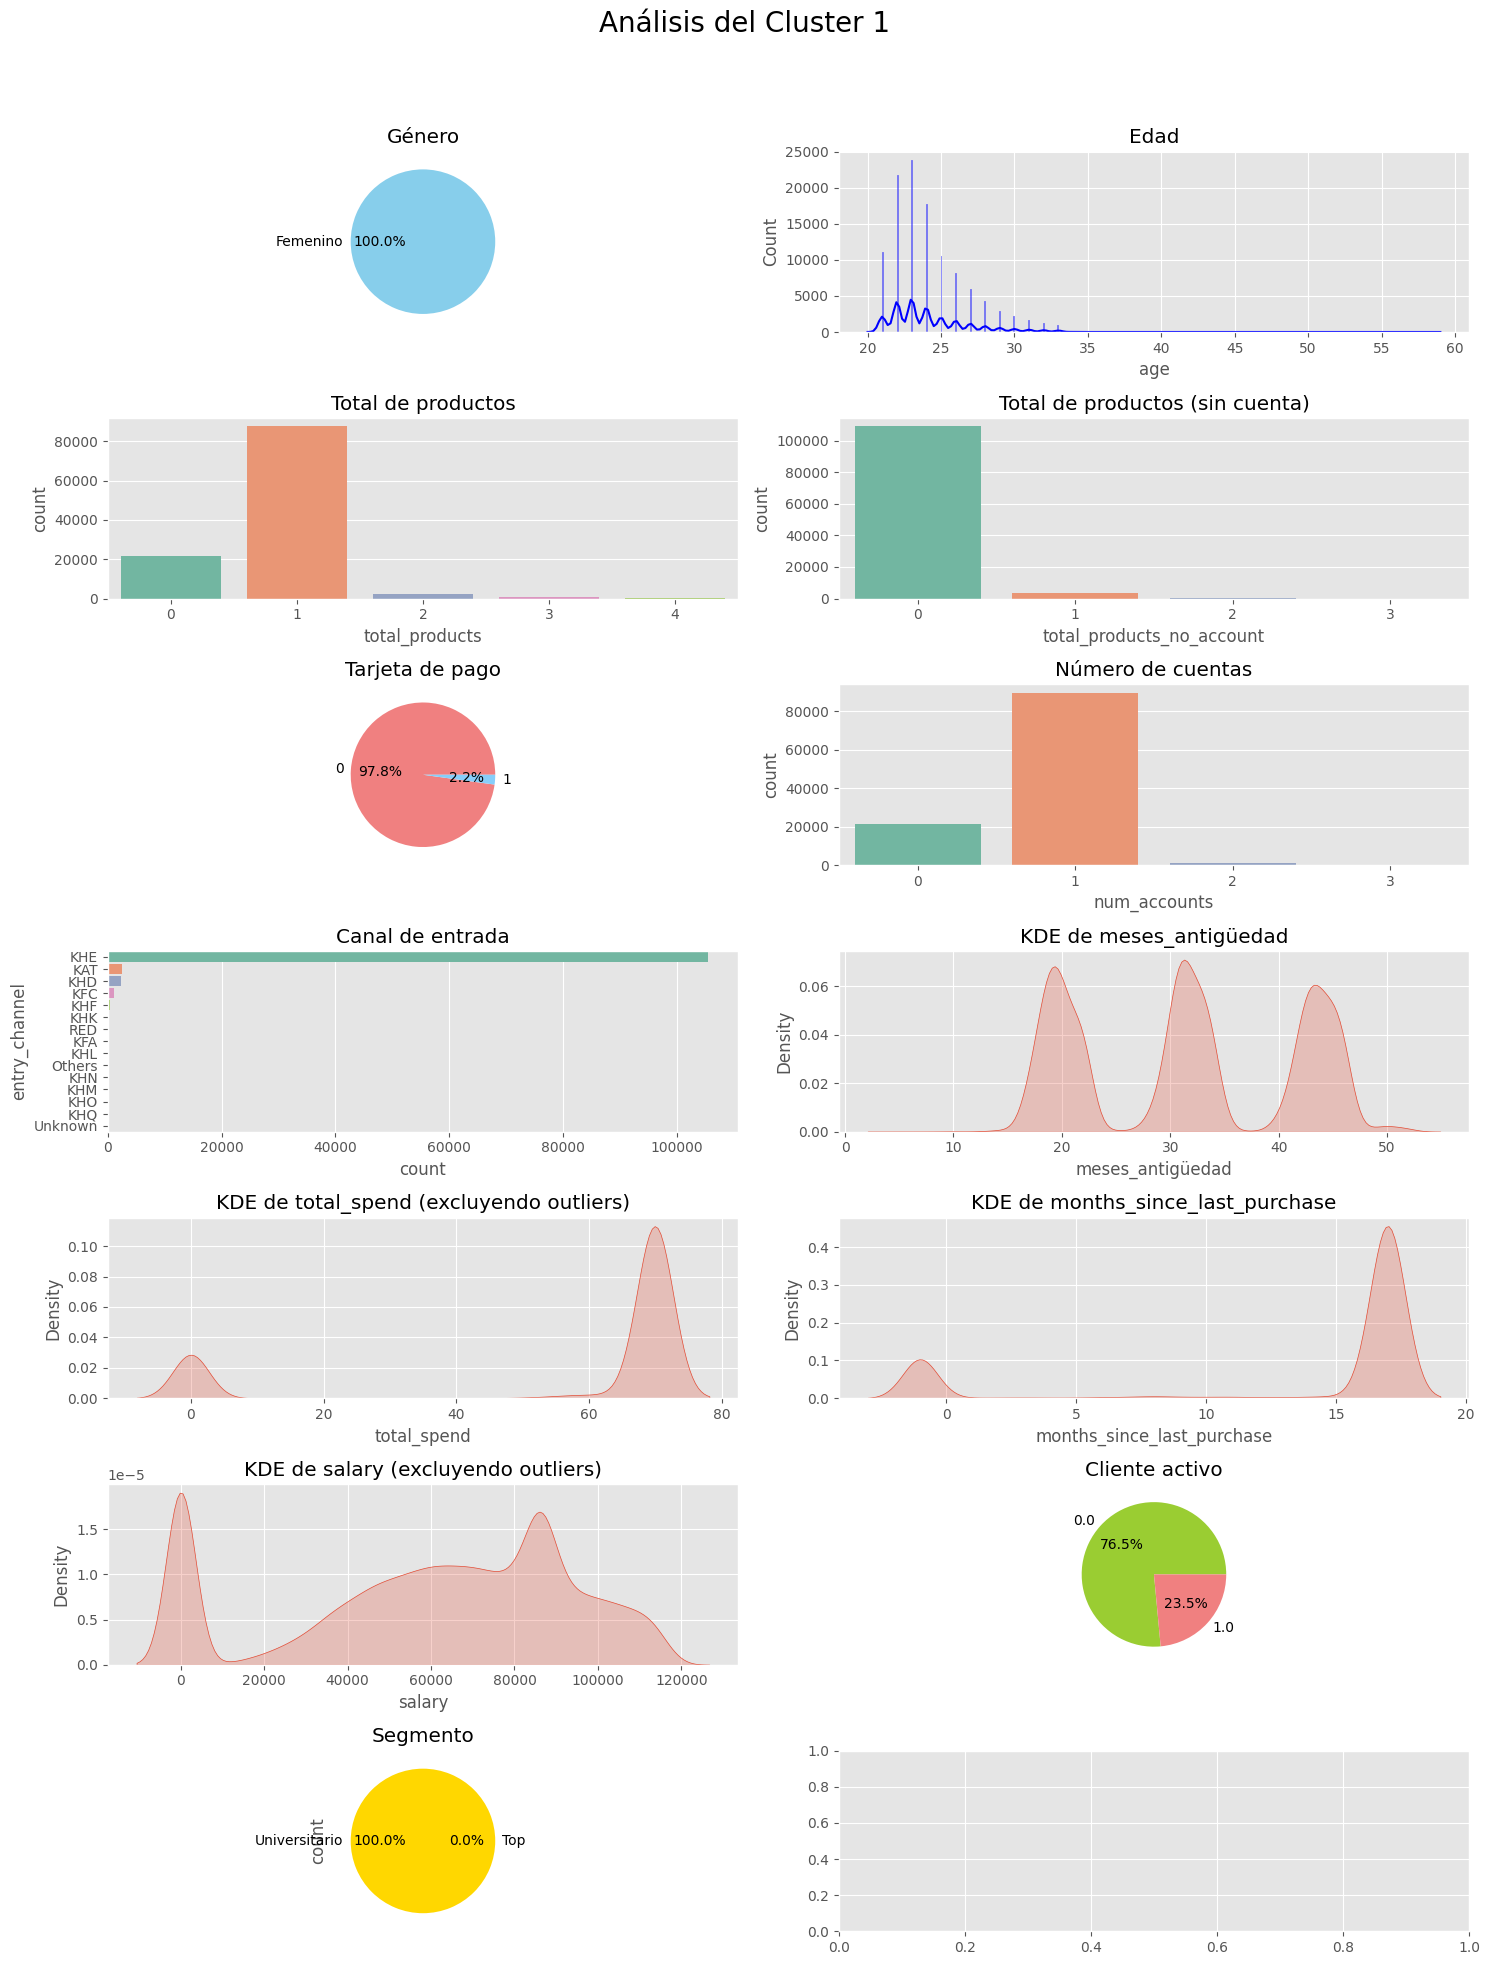

In [98]:
analizar_cluster_graficas(dataset_grupos,1)

In [99]:
estadisticas_cluster(dataset_grupos,1)

age        salary  meses_antigüedad    total_spend  \
count  112408.000000  1.124080e+05     112408.000000  112408.000000   
mean       24.188723  9.817741e+04         31.613017     175.908625   
std         2.636923  1.929168e+05          9.970025     869.977766   
min        20.000000  0.000000e+00          5.000000       0.000000   
25%        22.000000  4.961749e+04         21.000000      69.970000   
50%        23.000000  8.138149e+04         31.000000      69.970000   
75%        25.000000  1.161183e+05         42.000000      69.970000   
max        59.000000  2.425324e+07         52.000000   17280.400000   

       months_since_last_purchase  
count               112408.000000  
mean                    13.473854  
std                      6.917734  
min                     -1.000000  
25%                     17.000000  
50%                     17.000000  
75%                     17.000000  
max                     17.000000

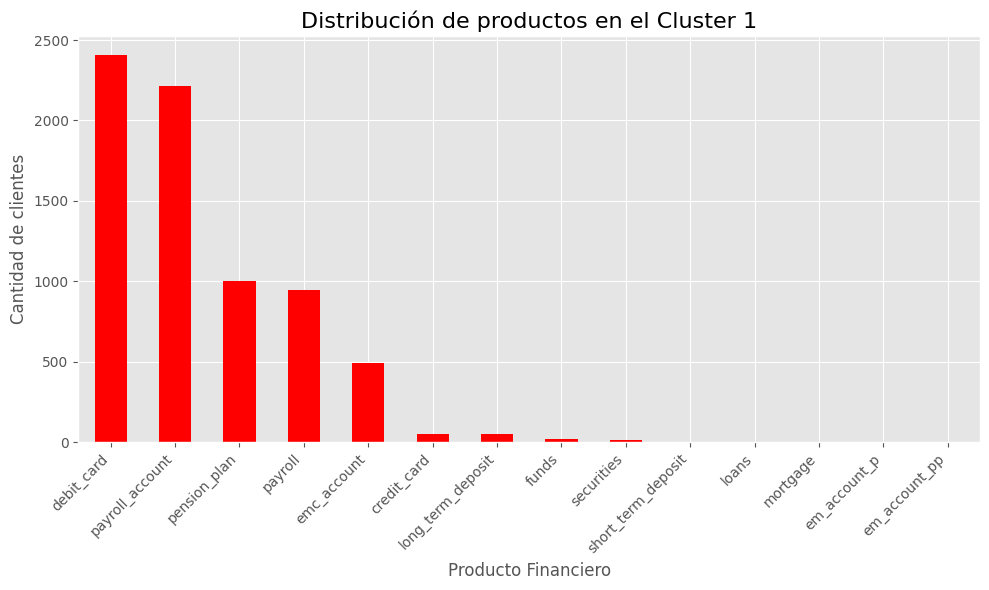

In [100]:
# visualizamos los productos más comunes sin contar la cuenta em_account debido a que la poseen la mayoría de clientes
visualizar_productos_cluster(dataset_grupos, 1)

Mujer de entre 22 y 25 años, generalmente con una cuenta contratada y, en ocasiones, algún producto adicional. No dispone de tarjeta de pago y accede a los servicios a través del canal KHE. Su antigüedad como cliente del banco suele ser de 20, 32 o 44 meses. El gasto medio registrado es de aproximadamente 70 €, que corresponde al valor que recibe el banco por cuenta.

En la mayoría de los casos, realizó su última compra hace 17 meses, lo que indica que no es una usuaria muy activa en la plataforma. Su salario es de nivel medio-alto, oscilando entre 50,000 y 120,000 euros anuales. Según la clasificación del banco, este perfil es considerado "Universitario" (aunque se recomienda no dar demasiada importancia a esta categoría).

En cuanto a los productos que suele contratar, predominan la tarjeta de débito y la cuenta de nómina, seguidos en menor medida por el plan de pensiones y la cuenta de nómina (la cual se considera también como una cuenta bancaria).


#### Cluster 2 

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

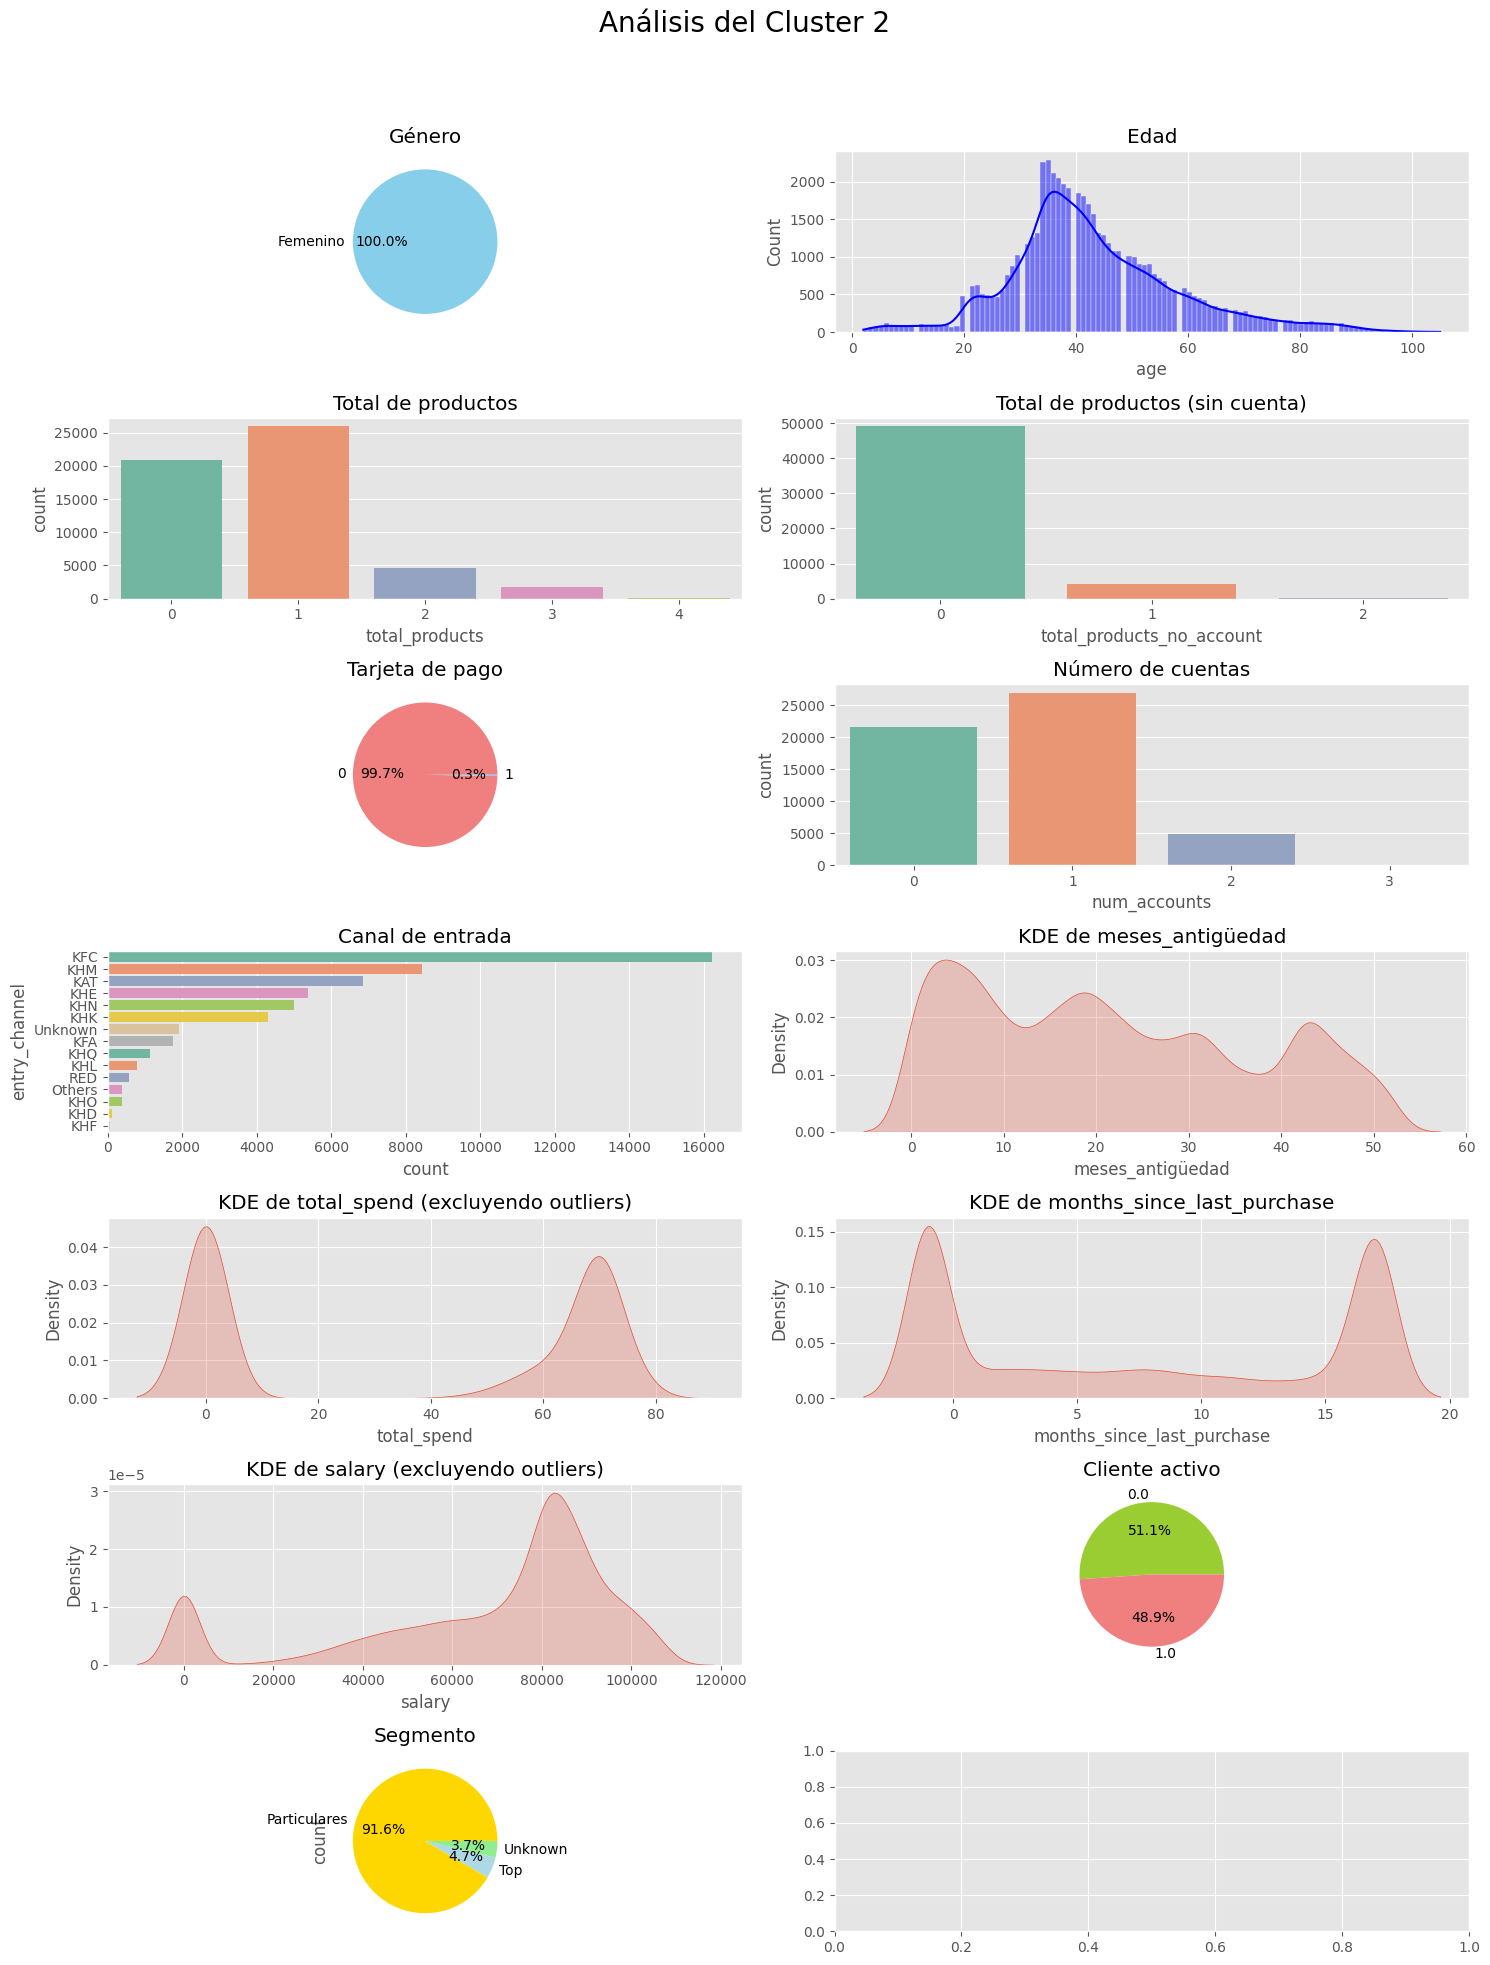

In [101]:
analizar_cluster_graficas(dataset_grupos,2)

In [102]:
estadisticas_cluster(dataset_grupos,2)

age        salary  meses_antigüedad   total_spend  \
count  53271.000000  5.327100e+04      53271.000000  53271.000000   
mean      43.077359  1.008472e+05         21.636876    439.754105   
std       15.080627  2.248148e+05         15.181920   1329.515500   
min        2.000000  0.000000e+00          0.000000      0.000000   
25%       34.000000  6.633824e+04          8.000000      0.000000   
50%       41.000000  8.421747e+04         20.000000     69.970000   
75%       51.000000  1.078326e+05         33.000000     78.000000   
max      105.000000  2.889440e+07         52.000000  16752.500000   

       months_since_last_purchase  
count                53271.000000  
mean                     7.615138  
std                      7.702139  
min                     -1.000000  
25%                     -1.000000  
50%                      7.000000  
75%                     17.000000  
max                     17.000000

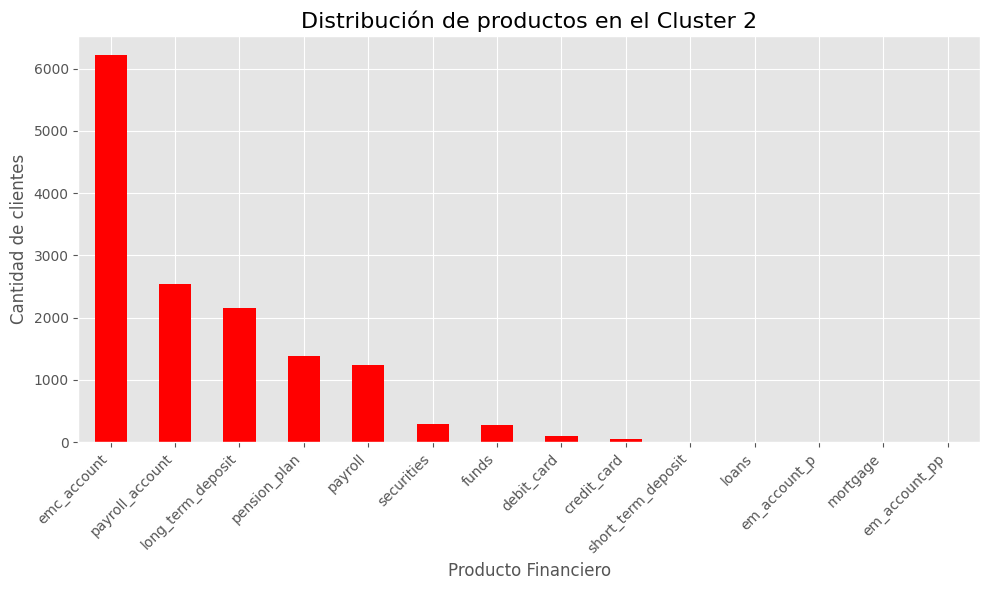

In [103]:
visualizar_productos_cluster(dataset_grupos, 2)

Mujer de entre 34 y 51 años, que no suele tener productos contratados más que 1 o 2 cuentas. Sin tarjeta de pago y cuyo canal de captación del cliente es mayoritariamente KFC, seguido, en menor medida, de KHM y KAT. Respecto a los meses de antigüedad, es un target que varía mucho, con la media en unos 21 meses de antigüedad como cliente, pero es una variable que está muy distribuida. Es un tipo de cliente que tiene de media, un gasto en el banco de 70€ (el precio de una cuenta bancaria).

Este tipo de cliente se divide en dos respecto a su última actividad, la mitad de ellos no realizó compra o realizó su última acción con el banco hace menos de un mes y la otra mitad, hace unos 17 meses. Por lo que se trata de clientes no activos. Es un público que tiene un salario que ronda los 100K €. Es considerado como Particular (dento de los segmentos que maneja el banco) y el producto más afín a este tipo de cliente es la emc_account y, en mucha menor medida, payroll_account, long_term_deposit, pension_plan y payroll.

#### Cluster 3

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

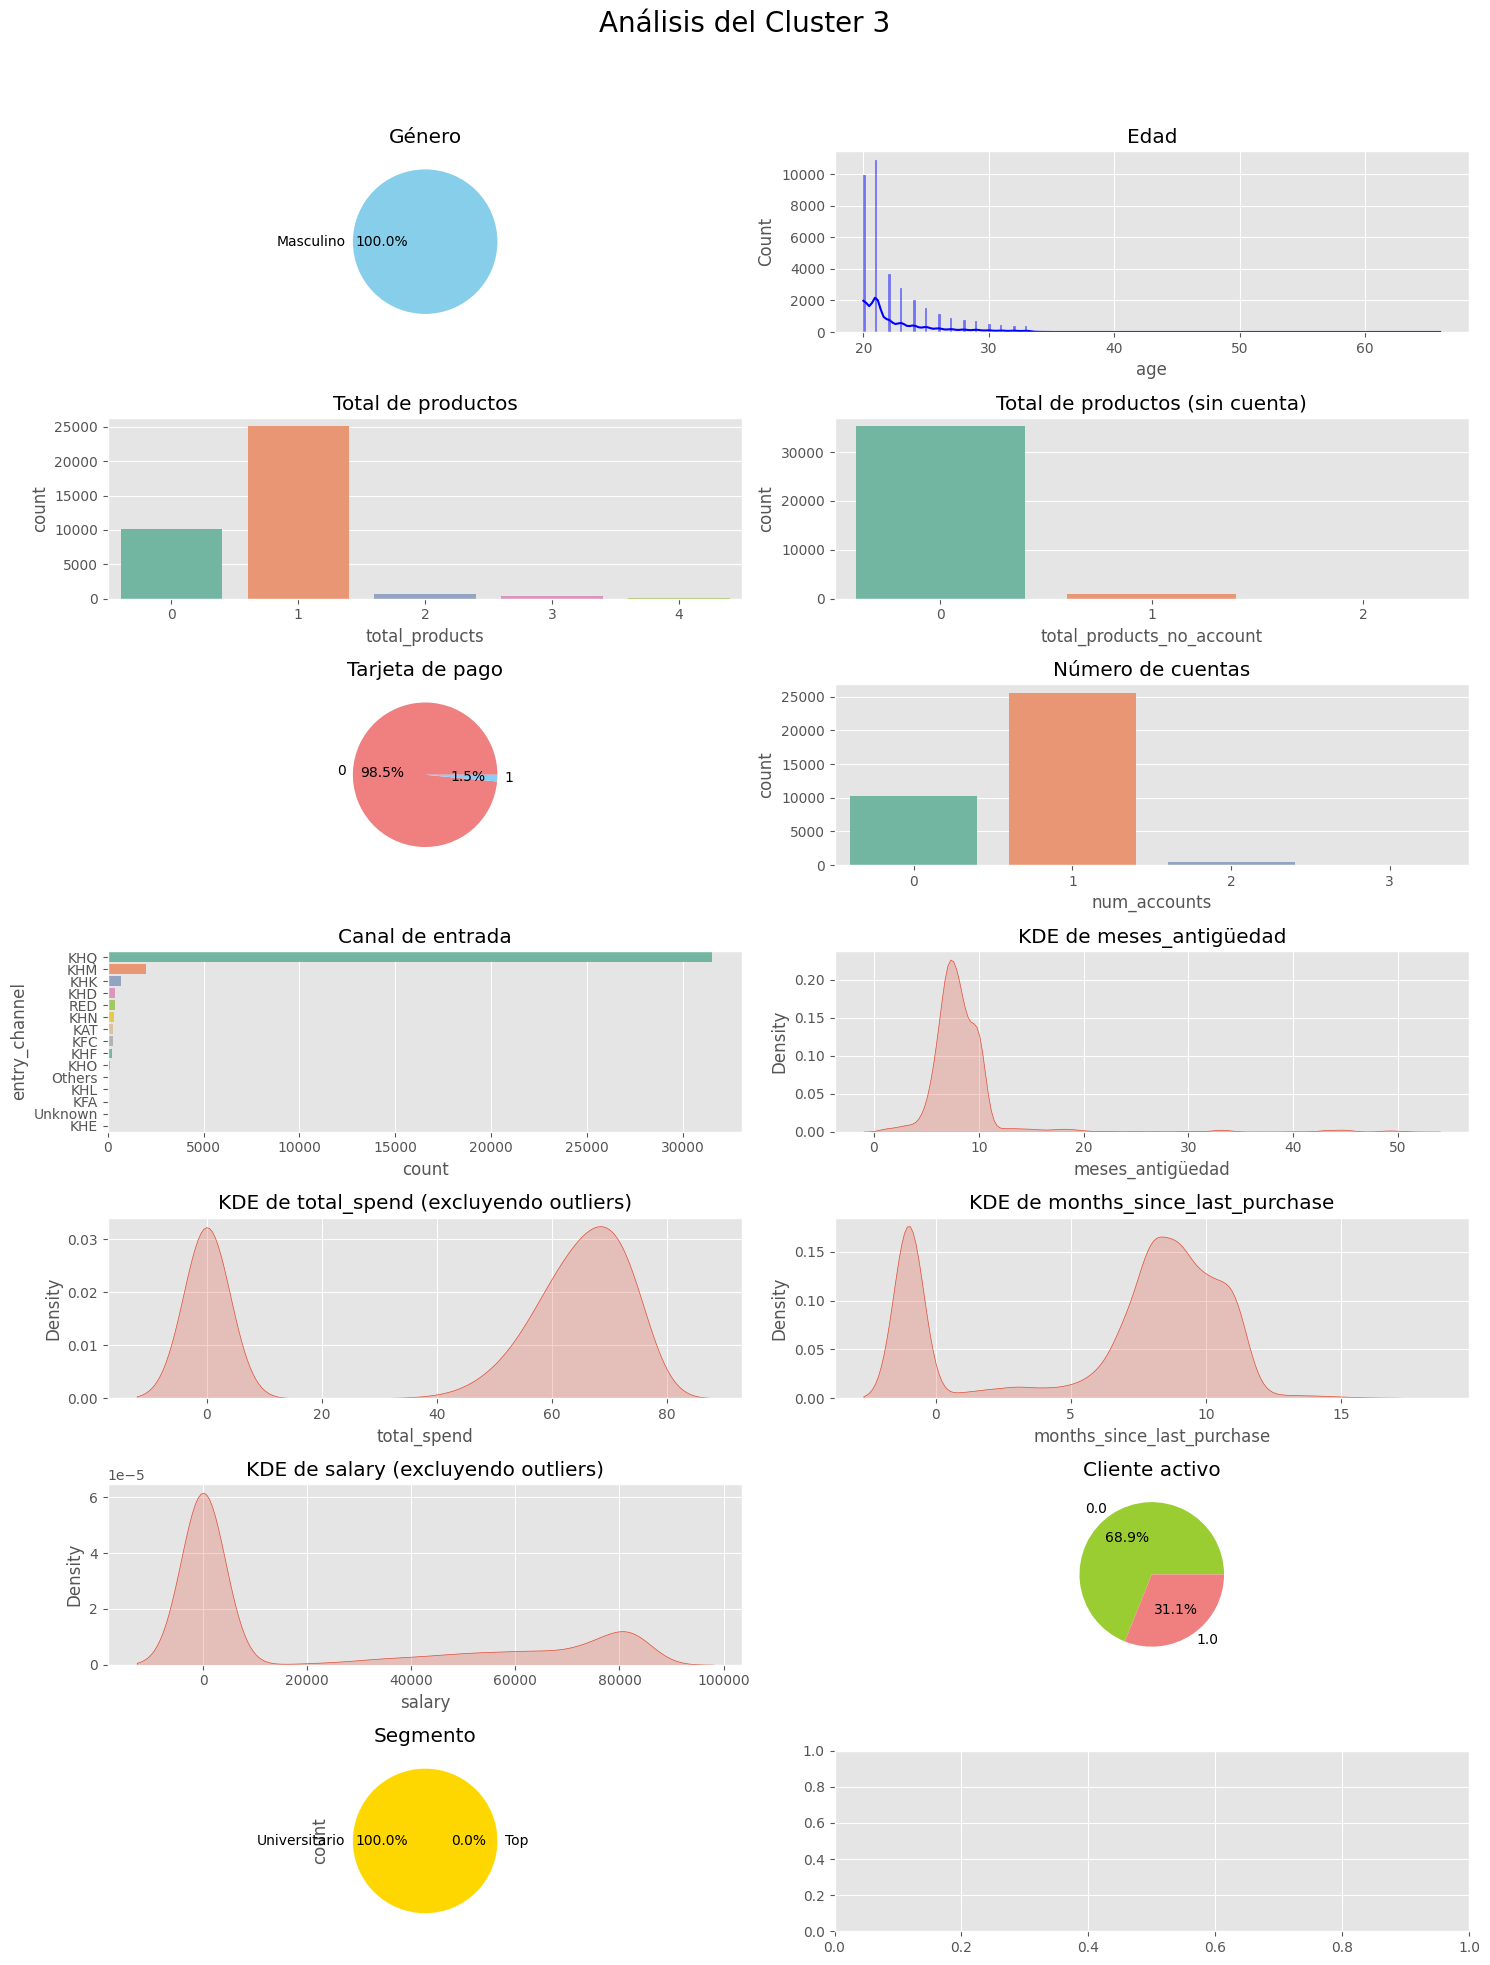

In [104]:
analizar_cluster_graficas(dataset_grupos,3)

In [105]:
estadisticas_cluster(dataset_grupos,3)

age        salary  meses_antigüedad   total_spend  \
count  36191.000000  3.619100e+04      36191.000000  36191.000000   
mean      22.443342  5.386157e+04          8.805946    161.572301   
std        3.041727  8.026753e+04          5.474022    846.719602   
min       20.000000  0.000000e+00          1.000000      0.000000   
25%       20.000000  0.000000e+00          7.000000     43.850000   
50%       21.000000  2.757612e+04          8.000000     66.400000   
75%       23.000000  8.534186e+04          9.000000     76.000000   
max       66.000000  3.001756e+06         52.000000  18006.800000   

       months_since_last_purchase  
count                36191.000000  
mean                     6.257219  
std                      4.538243  
min                     -1.000000  
25%                      1.000000  
50%                      8.000000  
75%                     10.000000  
max                     17.000000

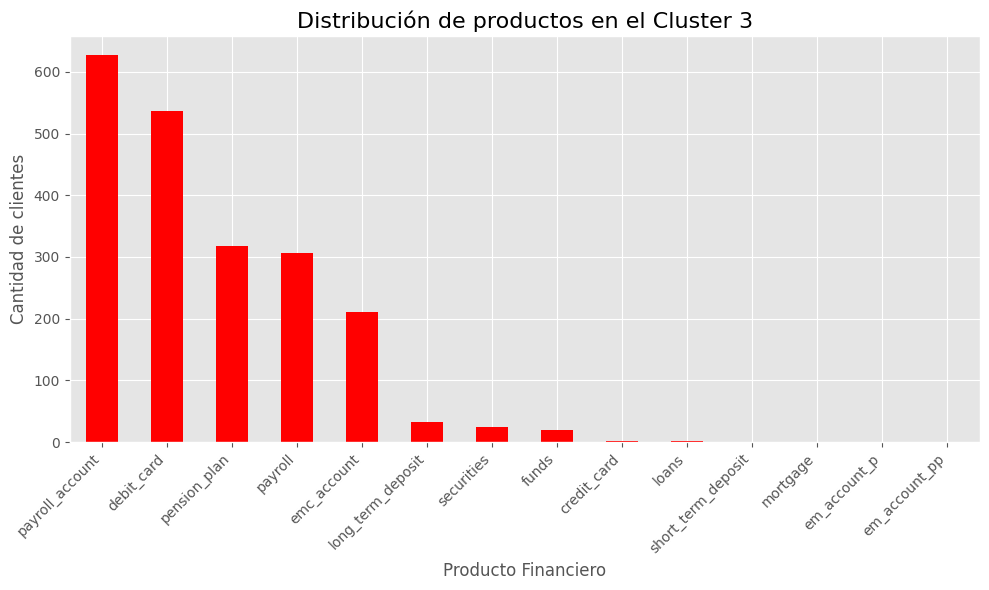

In [106]:
visualizar_productos_cluster(dataset_grupos, 3)

Hombre joven, de unos 20 a 22 años, que puede tener una cuenta (o incluso ninguna en ciertos casos) y no dispone de tarjeta de pago. Su canal de captación fue KHQ. Este grupo presenta una antigüedad promedio de 8 a 9 meses, y su gasto medio se aproxima a los 70 €. La mayoría no ha adquirido ningún producto bancario en más de 6 meses.

El salario promedio de este perfil es de 50,000 €, con un buen número de personas en torno a los 80,000 €. Este grupo es considerado "Universitario" dentro de los segmentos del banco. Los productos más afines a este tipo de cliente son payroll_account y debit_card, seguidos por pension_plan, payroll y emc_account.

#### Cluster 4 

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

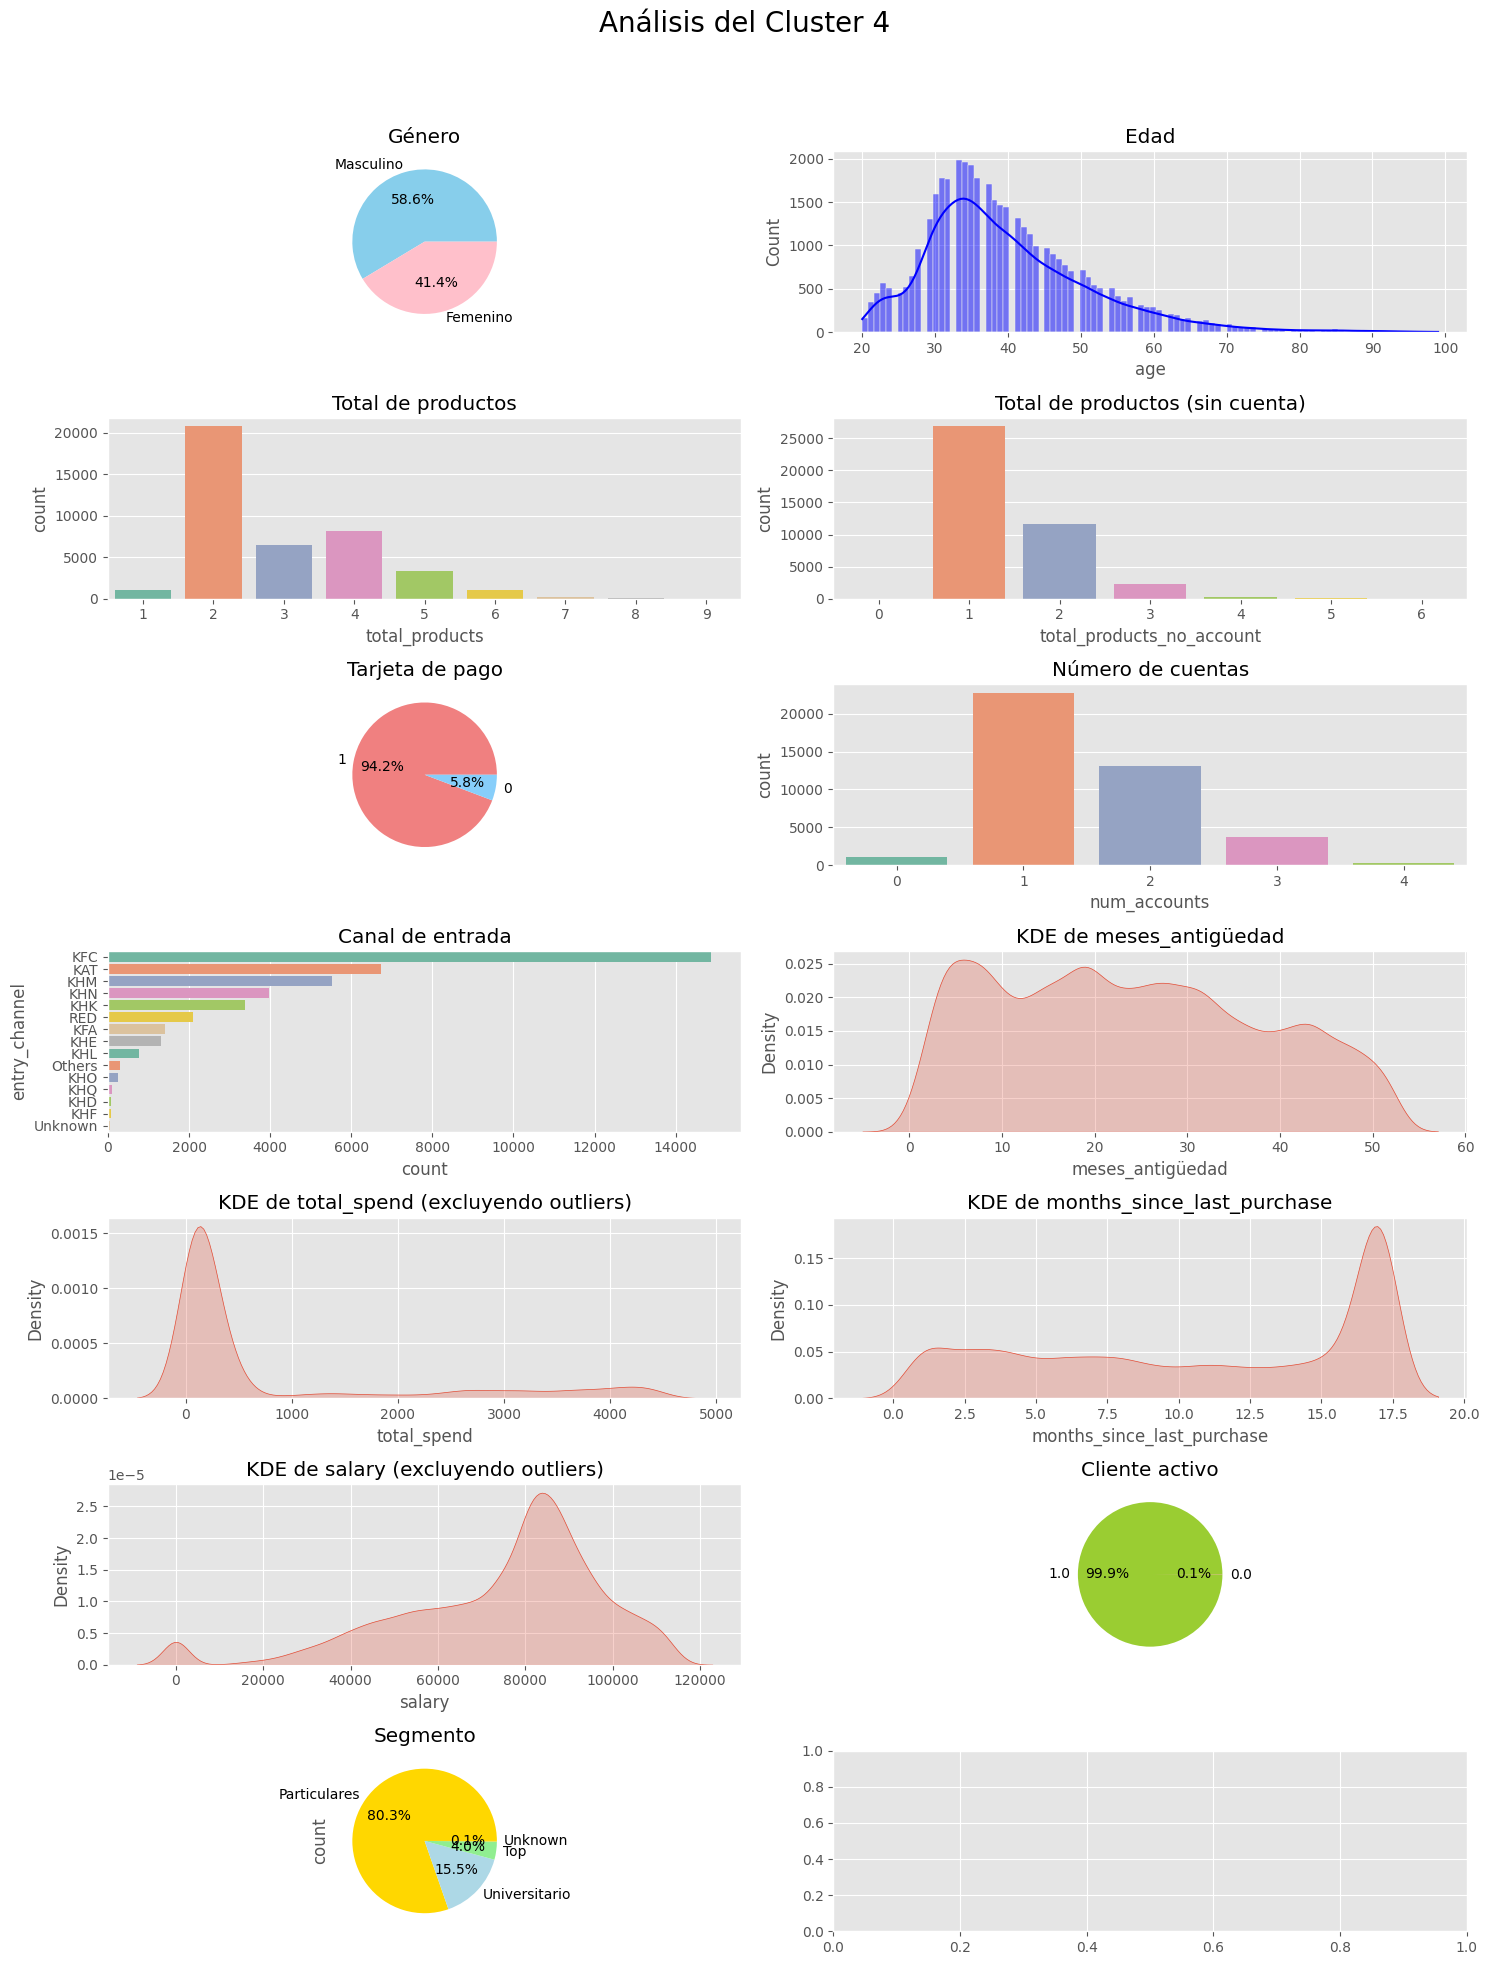

In [107]:
analizar_cluster_graficas(dataset_grupos,4)

In [108]:
estadisticas_cluster(dataset_grupos,4)

age        salary  meses_antigüedad   total_spend  \
count  40921.000000  4.092100e+04      40921.000000  40921.000000   
mean      39.818919  1.071147e+05         23.884802   2298.935854   
std       11.296932  2.207780e+05         14.062972   2965.559367   
min       20.000000  0.000000e+00          0.000000     40.800000   
25%       32.000000  6.992685e+04         12.000000    124.100000   
50%       38.000000  8.654637e+04         23.000000    297.840549   
75%       46.000000  1.139002e+05         35.000000   4463.900000   
max       99.000000  2.889440e+07         52.000000  18072.600000   

       months_since_last_purchase  
count                40921.000000  
mean                    10.658830  
std                      5.805292  
min                      1.000000  
25%                      5.000000  
50%                     11.000000  
75%                     17.000000  
max                     17.000000

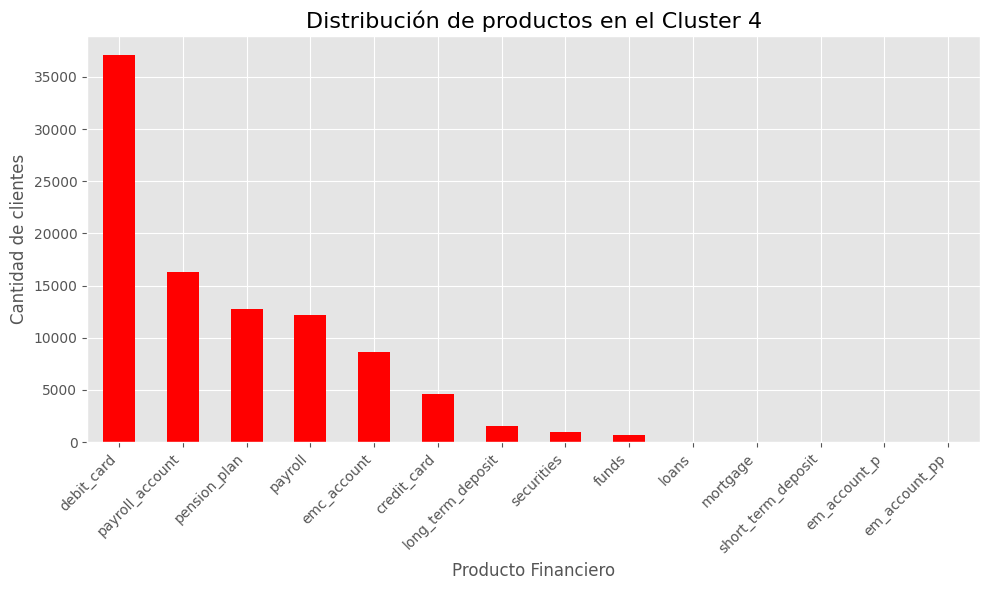

In [109]:
visualizar_productos_cluster(dataset_grupos, 4)

Este cluster está compuesto por un 60% de hombres y un 40% de mujeres, con edades que oscilan entre 30 y 50 años. Son clientes bastante activos que suelen tener entre 1 y 3 productos bancarios (sin contar las cuentas, que pueden ser de 1 a 3). La mayoría tiene tarjeta de pago y son captados principalmente por el canal KFC, aunque también provienen de otros canales.

La antigüedad de estos clientes varía ampliamente, desde 1 mes hasta 50 meses. Mientras que algunos no tienen prácticamente gasto, la media se sitúa en alrededor de 300 €, con un gran volumen que fluctúa entre 3,000 y 4,000 €. Generalmente, su última compra fue hace entre 16 y 17 meses, aunque hay casos desde la última compra de hace un mes hasta 16 meses. Su salario promedio es alto, alrededor de 100,000 €, y son considerados principalmente como "Particulares" según el segmento del banco. Los productos más comunes entre este grupo son la debit_card, así como payroll_account, pension_plan, payroll, emc_account y credit_card.

#### Cluster 5 

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

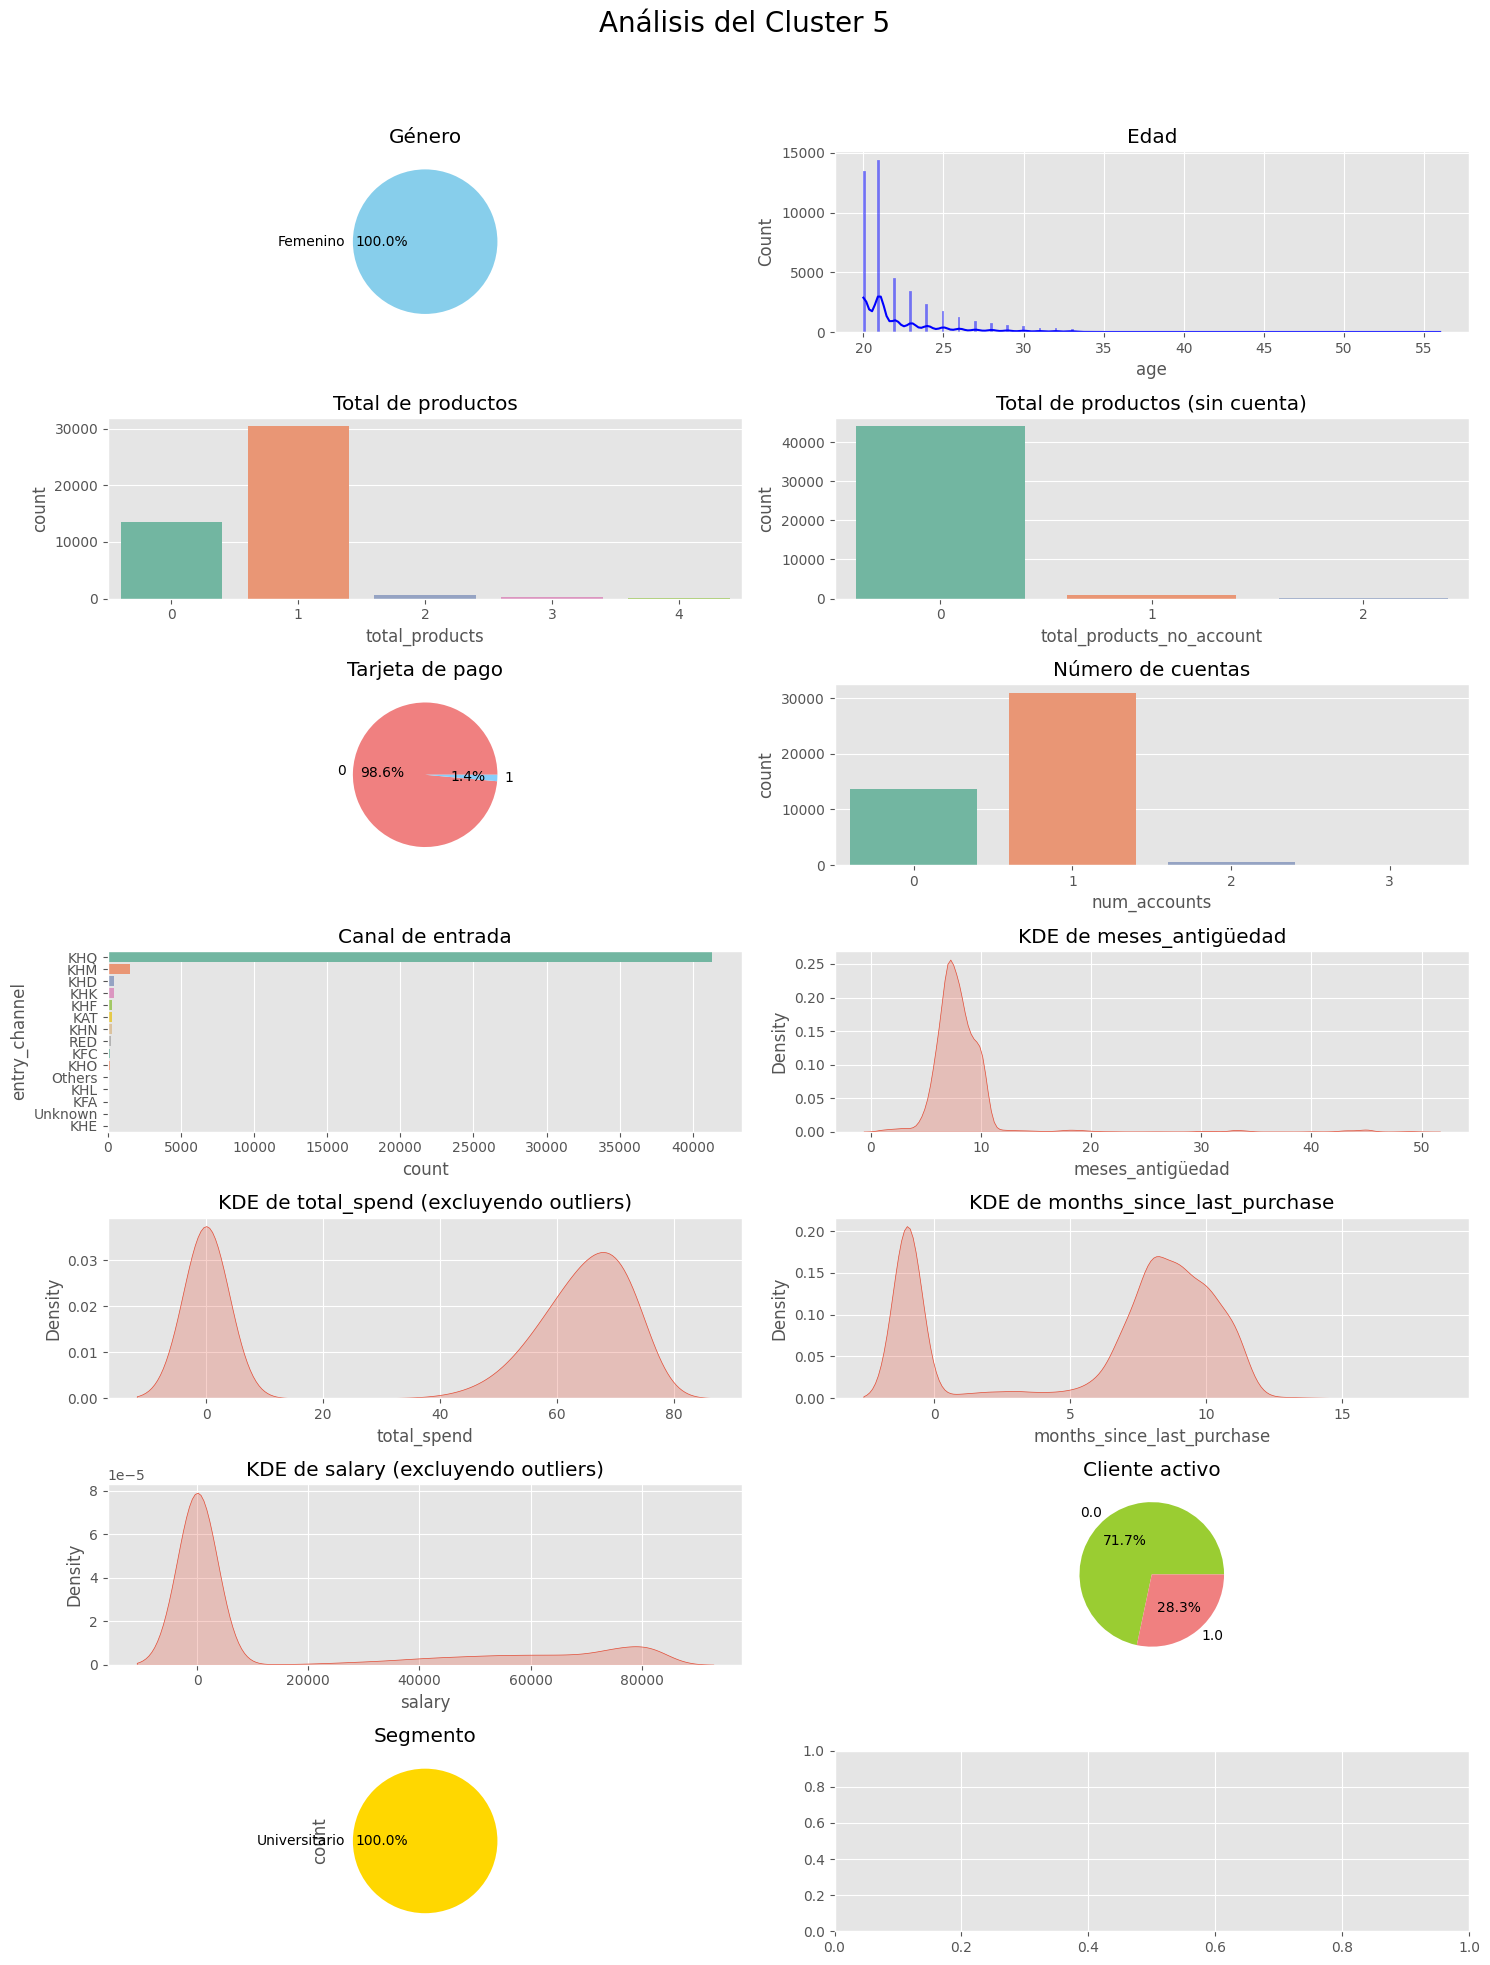

In [110]:
analizar_cluster_graficas(dataset_grupos,5)

In [111]:
estadisticas_cluster(dataset_grupos,5)

age        salary  meses_antigüedad   total_spend  \
count  45071.000000  4.507100e+04      45071.000000  45071.000000   
mean      22.100331  4.729021e+04          8.450112    142.569157   
std        2.704327  7.880638e+04          4.799123    787.294213   
min       20.000000  0.000000e+00          1.000000      0.000000   
25%       20.000000  0.000000e+00          7.000000      0.000000   
50%       21.000000  0.000000e+00          8.000000     65.300000   
75%       23.000000  8.205333e+04          9.000000     75.000000   
max       56.000000  3.041389e+06         50.000000  16876.200000   

       months_since_last_purchase  
count                45071.000000  
mean                     5.927448  
std                      4.590883  
min                     -1.000000  
25%                     -1.000000  
50%                      8.000000  
75%                      9.000000  
max                     17.000000

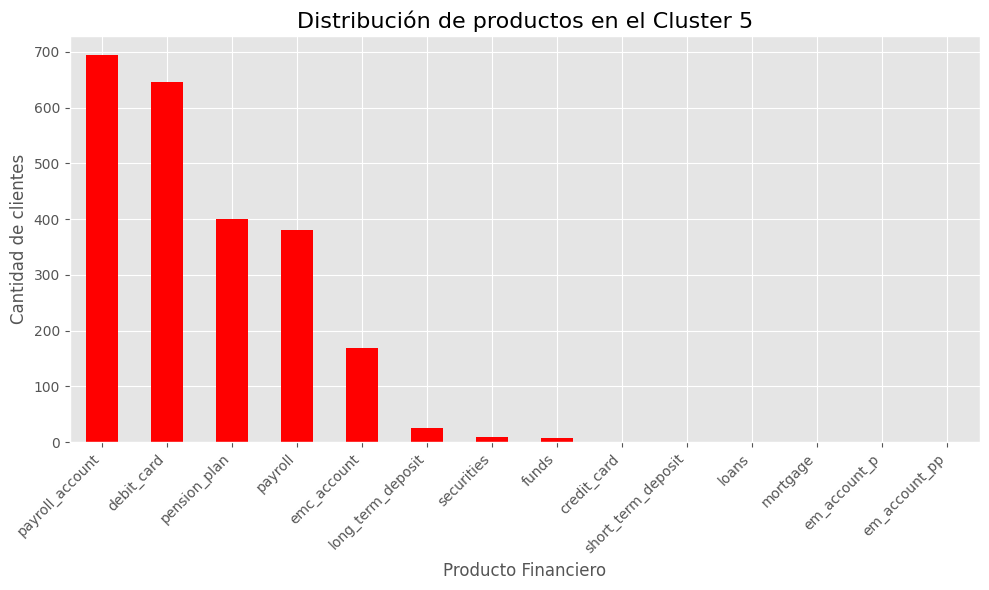

In [112]:
visualizar_productos_cluster(dataset_grupos, 5)

Mujeres de aproximadamente 20 a 22 años. Este grupo suele tener una cuenta (o ninguna) contratada y no posee tarjeta de pago. La mayoría fue captada a través del canal KHQ y presentan una antigüedad media de 8 a 9 meses. Su gasto promedio ronda los 70 € (equivalente al costo de una cuenta), y suelen ser clientes poco activos, con un tiempo promedio de 8 a 9 meses desde su última adquisición.

El salario medio de este perfil es de alrededor de 80,000 € anuales, y está catalogado por el banco como "Universitario". Los productos más comunes que suelen contratar incluyen payroll_account y debit_card, seguidos por pension_plan y payroll.

#### Cluster 6 

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

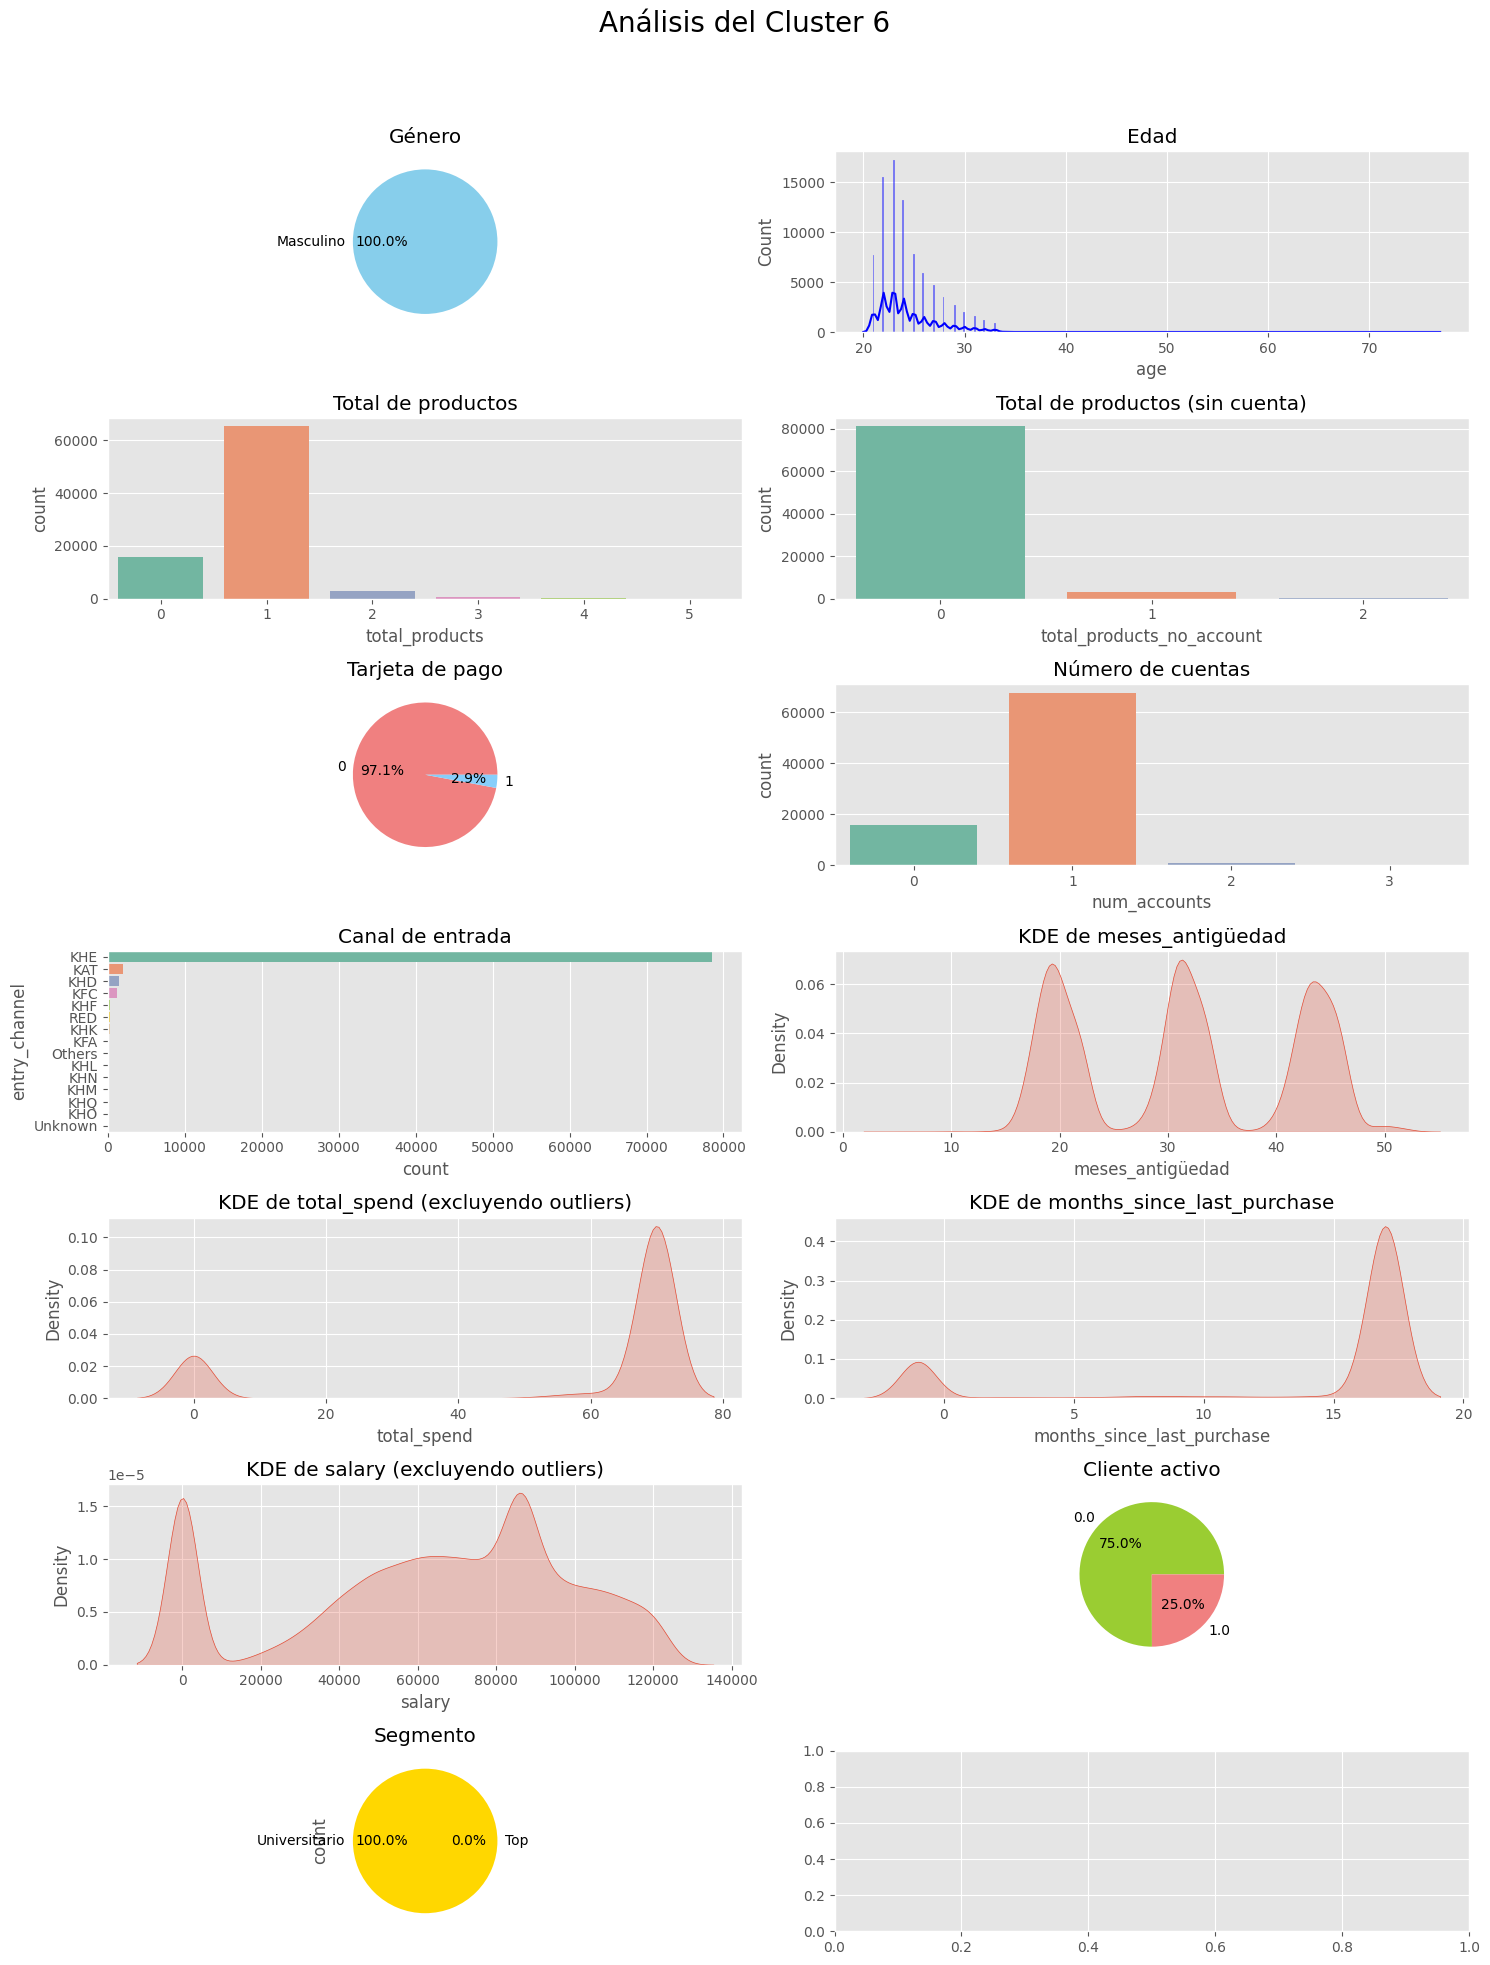

In [113]:
analizar_cluster_graficas(dataset_grupos,6)

In [114]:
estadisticas_cluster(dataset_grupos,6)

age        salary  meses_antigüedad   total_spend  \
count  84236.000000  8.423600e+04      84236.000000  84236.000000   
mean      24.381678  1.042300e+05         31.634361    181.189835   
std        2.786820  1.583402e+05         10.023549    887.150350   
min       20.000000  0.000000e+00          5.000000      0.000000   
25%       22.000000  5.314606e+04         21.000000     69.970000   
50%       24.000000  8.588557e+04         31.000000     69.970000   
75%       26.000000  1.237467e+05         43.000000     69.970000   
max       77.000000  1.326862e+07         52.000000  15829.300000   

       months_since_last_purchase  
count                84236.000000  
mean                    13.584311  
std                      6.773247  
min                     -1.000000  
25%                     17.000000  
50%                     17.000000  
75%                     17.000000  
max                     17.000000

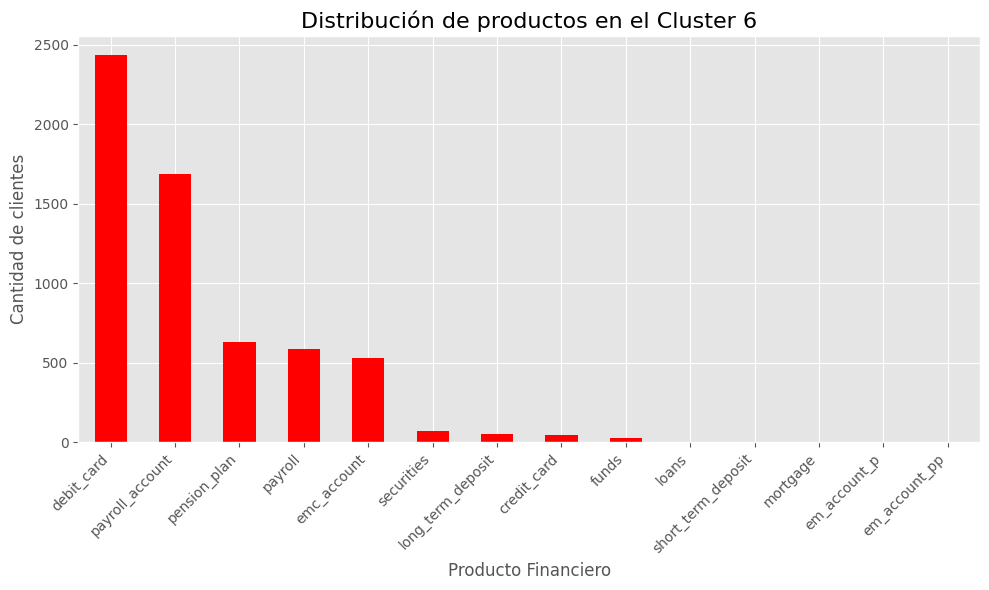

In [115]:
visualizar_productos_cluster(dataset_grupos, 6)

Hombre de entre 23 y 26 años, que generalmente tiene al menos una cuenta contratada, pero no cuenta con tarjeta de pago ni otros productos. Son captados principalmente por el canal KHE y pueden tener tres tramos de antigüedad: 20, 31 o 43 meses. Su gasto medio es de 70 € y suelen haber pasado unos 17 meses desde su última adquisición de productos.

Este grupo se caracteriza por ser poco activo en el banco. Sus salarios oscilan entre 40,000 € y 120,000 €, con un pico en 85,000 €. Según el banco, este perfil es considerado "Universitario". Los productos más habituales contratados son la debit_card y/o payroll_account, y en menor medida, pension_plan, payroll o emc_account.

#### Cluster 0 

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

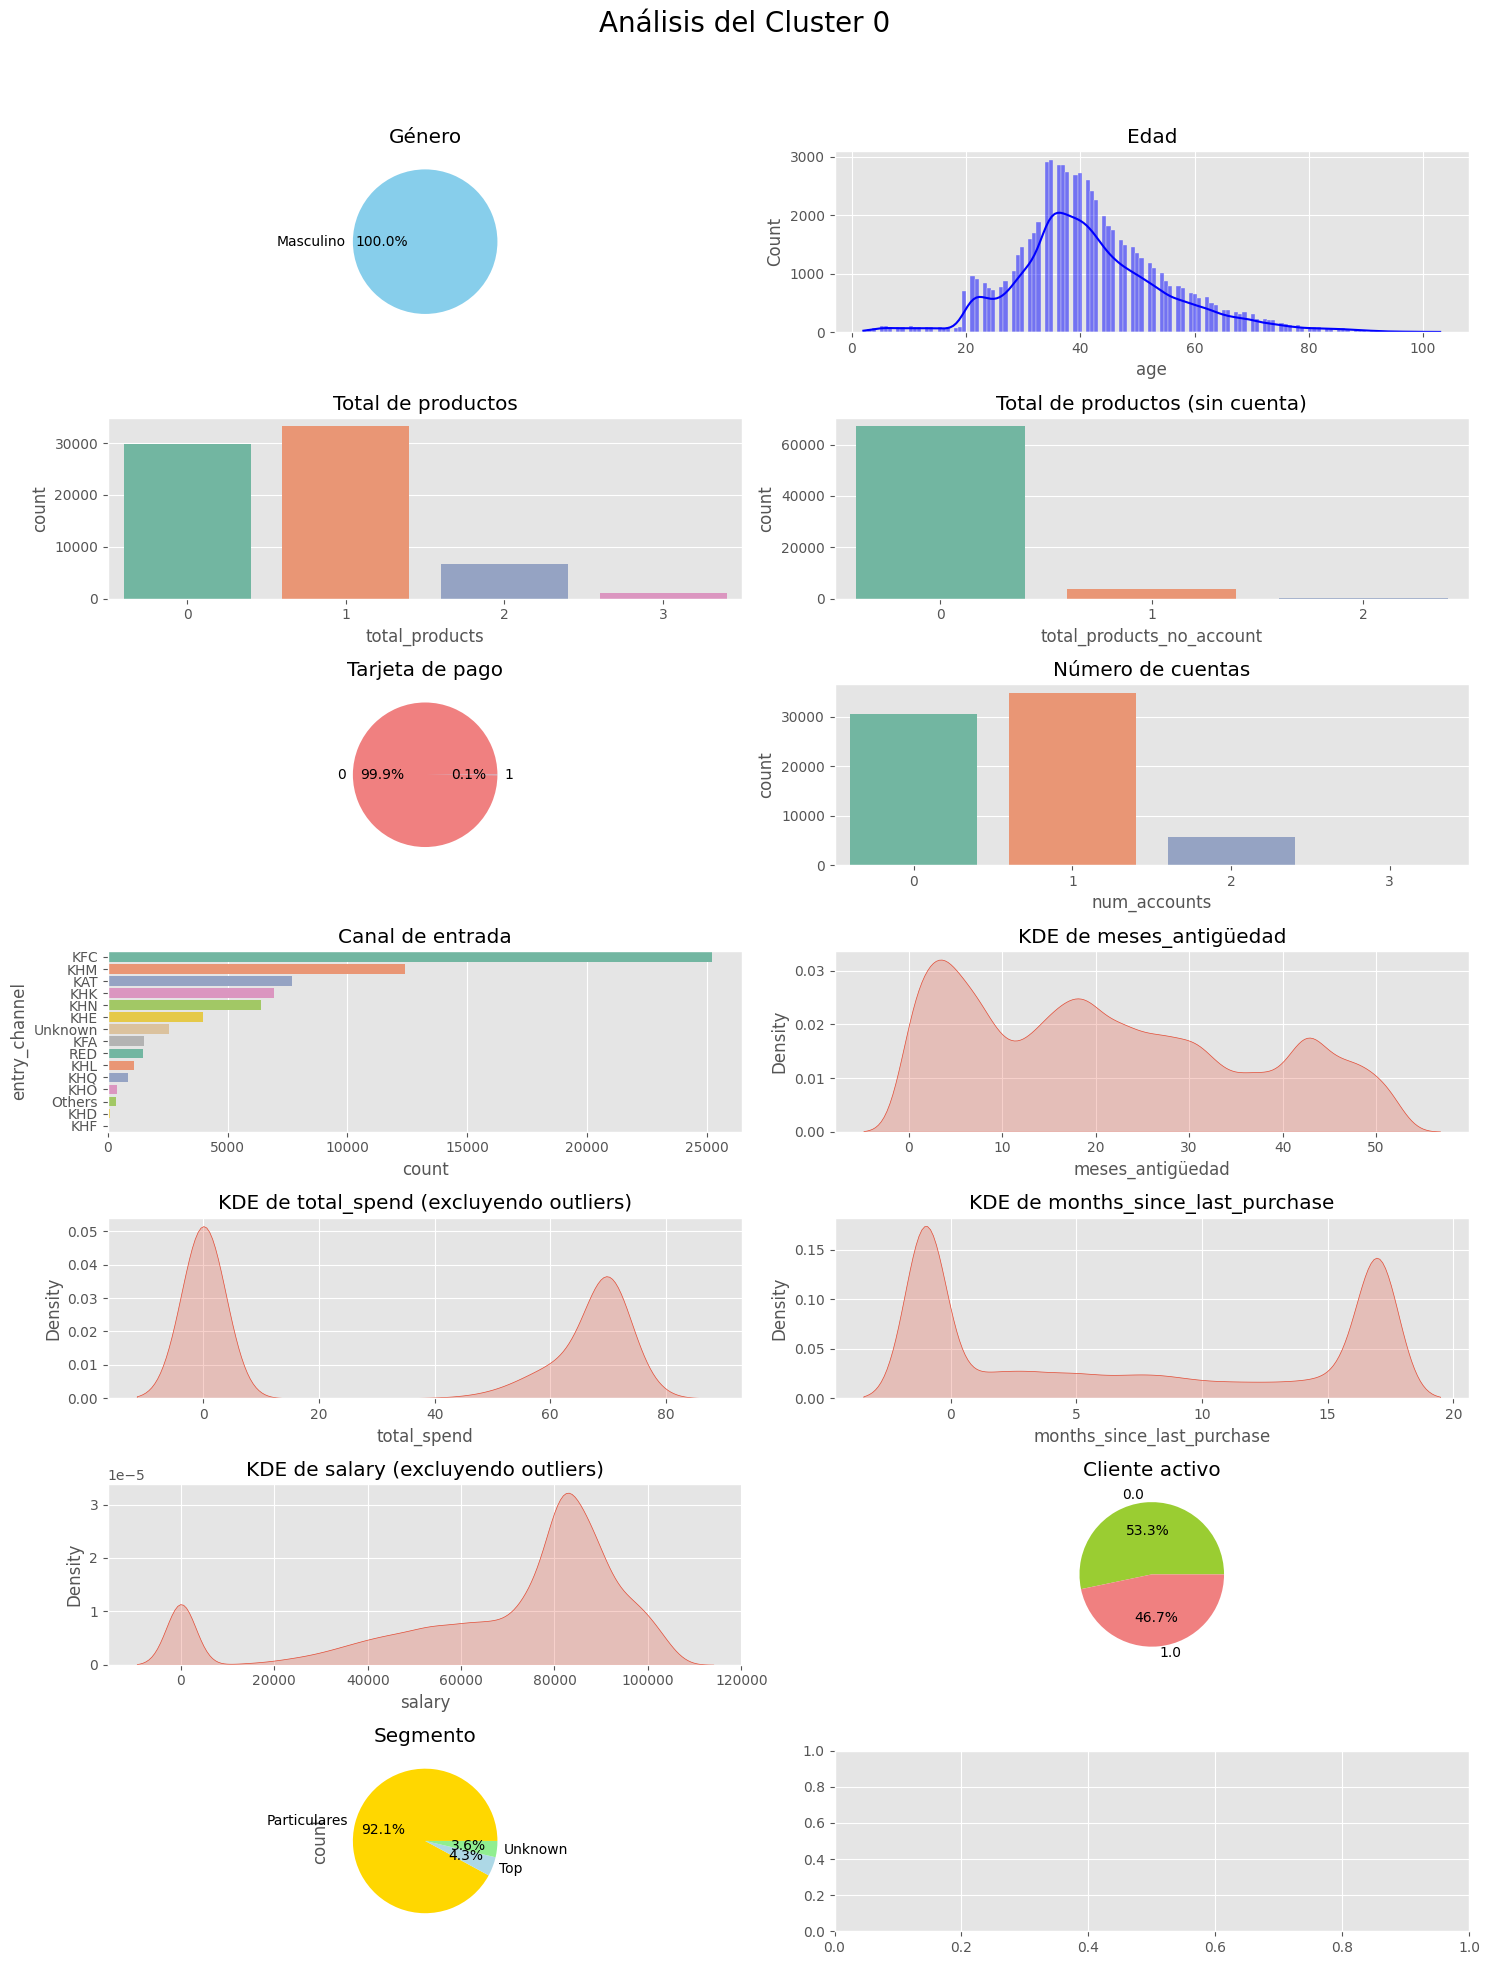

In [116]:
analizar_cluster_graficas(dataset_grupos,0)

In [117]:
estadisticas_cluster(dataset_grupos,0)

age        salary  meses_antigüedad   total_spend  \
count  70897.000000  7.089700e+04      70897.000000  70897.000000   
mean      41.784815  9.874338e+04         21.502010    341.649394   
std       13.417835  1.588392e+05         15.135874   1099.981637   
min        2.000000  0.000000e+00          0.000000      0.000000   
25%       34.000000  6.725406e+04          8.000000      0.000000   
50%       40.000000  8.421747e+04         19.000000     68.600000   
75%       49.000000  1.046041e+05         33.000000     76.700000   
max      103.000000  2.172419e+07         52.000000  18649.900000   

       months_since_last_purchase  
count                70897.000000  
mean                     7.245412  
std                      7.694654  
min                     -1.000000  
25%                     -1.000000  
50%                      6.000000  
75%                     17.000000  
max                     17.000000

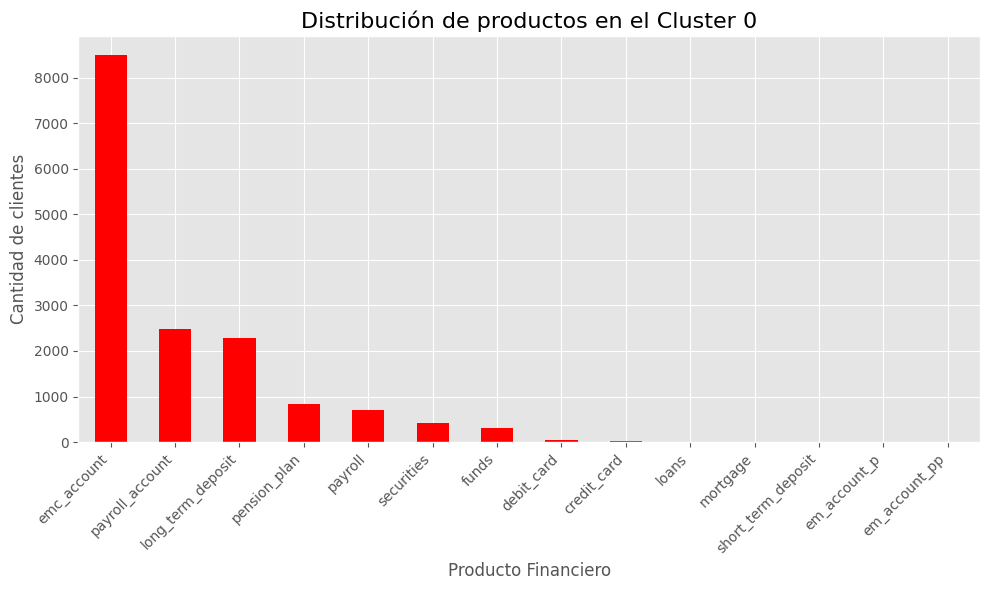

In [118]:
visualizar_productos_cluster(dataset_grupos, 0)

Hombre de aproximadamente 40 años, que suele tener entre una y dos cuentas contratadas, sin tarjeta de pago y, en ocasiones, algún producto adicional (aunque en muy pocas ocasiones). Este cliente es captado a través de varios canales, principalmente KFC, pero también KHM, KAT, KHK y KHN.

En cuanto a la antigüedad con el banco, hay una amplia variabilidad, desde nuevos clientes hasta aquellos con 50 meses de antigüedad. El gasto medio es de alrededor de 70 € (por las cuentas bancarias), y generalmente, la mitad de este grupo ha pasado unos 17 meses desde su última adquisición, mientras que la otra mitad es más activa. Su salario promedio se sitúa en 90,000 €, y está catalogado como "Particular" por el banco. Los productos más comunes entre este perfil son la emc_account, así como en ocasiones payroll_account y long_term_deposit.